# **Bike Sales Analysis**

---



## WQD7003 Data Analytics

## Dr. Saw Shier Nee


---



#### Group Members
#### Usman Ali (S2155904)
#### Vijaykumar Kartha Ramachandran (S2033073)
#### Tarsvini a/p Ravinther (17193844)
#### Rongxuan Lei (22071941)




# **CRoss-Industry Standard Process for Data Mining (CRISP-DM)**


*   Open Standard Process Model
*   Comprehensive approach emphasizing all aspects of the project
*   Focus on business issues and technical analysis
*   Comprises six phases
*   Flexible process flow
*   Developed by a consortium






## **CRISP-DM Phases**

1.   Business Understanding
2.   Data Understanding
3.   Data Preparation
4.   Modelling
5.   Evaluation
6.   Deployment






# **Business Understanding**


## Busniess Objective

> ##### Company is interested in sales analysis to enable data driven decision making process for profit growth.

## Assess Situation

> ##### A bike manufacturer is operating in six countries and its major product categories are bikes, accessories and clothing. The sales data from earlier years can be used for analysis.

## Data Mining Goals

1.  Extract meaningful insights according to location, time period and customer demographics
2.   Determine the highest profit earning countries, months and product categories
3.   Forecast profit for year 2016


## Project Plan



*   CRISP-DM phases are going to be followed iteratively to achieve business objective and data mining goals
*   Software/Tools
> 1.  Python
> 2.  Jupyter Notebook
> 3.  Machine learning, visualization and data frame manipulation libraries

# **Data Understanding**


## Collect Data

> ##### Bike Sales dataset is obtained from [Kaggle](https://www.kaggle.com/datasets/sadiqshah/bike-sales-in-europe)

## Describe Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor

import warnings
warnings.filterwarnings('ignore')

In [ ]:
dataset_url = 'https://raw.githubusercontent.com/usman2155904/wqd7003/main/Bike_Sales.csv'
dfc = pd.read_csv(dataset_url)
dfc.head(5)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,11/26/2013,26,November,2013,19.0,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,11/26/2015,26,November,2015,19.0,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,3/23/2014,23,March,2014,49.0,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,3/23/2016,23,March,2016,49.0,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,5/15/2014,15,May,2014,47.0,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [ ]:
display(dfc.shape)

(113036, 18)

In [ ]:
display(dfc.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Date              113036 non-null  object 
 1   Day               113036 non-null  int64  
 2   Month             113036 non-null  object 
 3   Year              113036 non-null  int64  
 4   Customer_Age      113009 non-null  float64
 5   Age_Group         113009 non-null  object 
 6   Customer_Gender   113036 non-null  object 
 7   Country           113036 non-null  object 
 8   State             113036 non-null  object 
 9   Product_Category  113036 non-null  object 
 10  Sub_Category      113036 non-null  object 
 11  Product           113036 non-null  object 
 12  Order_Quantity    113036 non-null  int64  
 13  Unit_Cost         113036 non-null  int64  
 14  Unit_Price        113036 non-null  int64  
 15  Profit            113036 non-null  int64  
 16  Cost              11

None

In [ ]:
display(dfc.describe())

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.000000,113036.000000,113009.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,15.665753,2014.401739,35.918042,11.901465,267.296366,452.938427,285.051665,469.318695,754.370360
std,8.781567,1.272510,11.022630,9.562099,549.835483,922.071219,453.887443,884.866118,1309.094674
min,1.000000,2011.000000,17.000000,-1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


## Verify Data Quality

Find duplicate records

In [ ]:
dfc.duplicated().sum()

1000

Find columns with missing values

In [ ]:
# Checking for missing values
dfc.isnull().sum()

Date                 0
Day                  0
Month                0
Year                 0
Customer_Age        27
Age_Group           27
Customer_Gender      0
Country              0
State                0
Product_Category     0
Sub_Category         0
Product              0
Order_Quantity       0
Unit_Cost            0
Unit_Price           0
Profit               0
Cost                 0
Revenue              0
dtype: int64

Inconsistent Data

In [ ]:
# distinct values count
display(dfc.Customer_Gender.value_counts())

M         58294
F         54716
Male         18
Female        8
Name: Customer_Gender, dtype: int64

Nosiy Data

In [ ]:
# negative values count
display(dfc[dfc['Order_Quantity']<0].Order_Quantity.value_counts())

-1    11
Name: Order_Quantity, dtype: int64

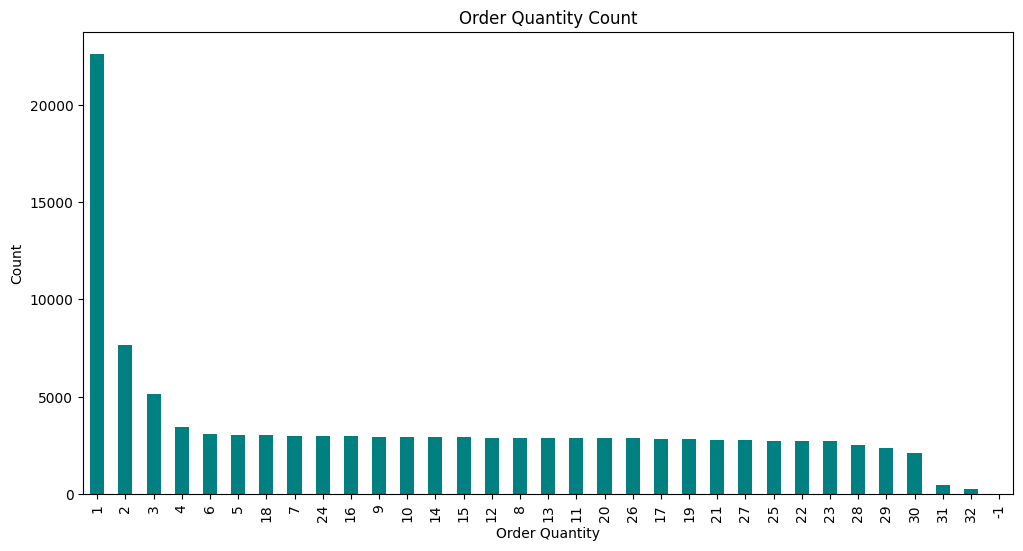

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Order Quantity Count')
plt.xlabel('Order Quantity')
plt.ylabel('Count')
dfc.Order_Quantity.value_counts().plot(kind = 'bar', color ='teal');

## Data Cleaning (Data Pre-processing)

It is part of Data Preparation phase but data pre-processing is also required for data exploration.

Remove duplicate records.

In [ ]:
dfc = dfc.drop_duplicates()
dfc.shape

(112036, 18)

In [ ]:
dfc.duplicated().values.any()

False

Imputation of missing values

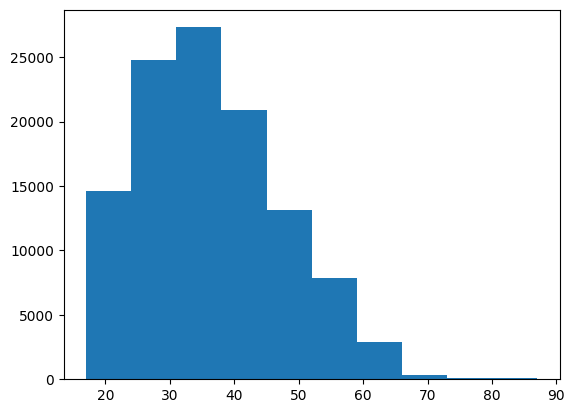

In [ ]:
plt.hist(dfc['Customer_Age'])
plt.show()

In [ ]:
round(dfc['Customer_Age'].median())

35

In [ ]:
dfc['Age_Group'].mode()

0    Adults (35-64)
Name: Age_Group, dtype: object

Median imputation is used for customer age attribute because distribution is skewed. Mode imputation is used for age group whihc is a categorical attribute.

In [ ]:
dfc["Customer_Age"].fillna(35, inplace = True)
dfc["Age_Group"].fillna('Adults (35-64)', inplace = True)

No column with missing values after imputation

In [ ]:
# Checking for missing values
dfc.isnull().sum()

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

Solved inconsistent values of customer gender attribute.

In [ ]:
dfc['Customer_Gender'] = dfc['Customer_Gender'].replace(['Male'], 'M')
dfc['Customer_Gender'] = dfc['Customer_Gender'].replace(['Female'], 'F')

In [ ]:
# distinct values count
display(dfc.Customer_Gender.value_counts())

M    57813
F    54223
Name: Customer_Gender, dtype: int64

Smooth noisy data

In [ ]:
dfc['Order_Quantity'] = dfc['Order_Quantity'].replace([-1], 1)
# distinct values count
display(dfc[dfc['Order_Quantity']<0].Order_Quantity.value_counts())

Series([], Name: Order_Quantity, dtype: int64)

Box plot to show profit outliers

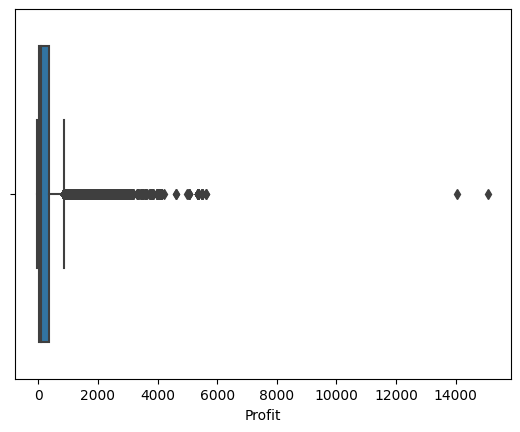

In [ ]:
sns.boxplot( x=dfc["Profit"] );
plt.show()

Profit outlier values are important information so it cannot be removed.

## Exploratory Data Analysis

####1. Extract meaningful insights according to location, time period and customer demographics


**Comparison between weekday and weekend sales profit.**

In [ ]:
#Assigning dataframe into new variable
dfc_new=dfc.copy()


#To find out if the date falls on weekend or weekday.
from datetime import datetime
for index,row in dfc_new.iterrows():
    date_string = datetime.strptime(row['Date'], '%m/%d/%Y')
    if date_string.weekday()<5:
        dfc_new.at[index,'Is_Weekend']= 'Y'
    else:
        dfc_new.at[index,'Is_Weekend']= 'N'

#Show dataframe with Is_Weekend column
dfc_new[['Date','Is_Weekend','Profit']].head(10)

,Date,Is_Weekend,Profit
0,11/26/2013,Y,590
1,11/26/2015,Y,590
2,3/23/2014,N,1366
3,3/23/2016,Y,1188
4,5/15/2014,Y,238
5,5/15/2016,N,297
6,5/22/2014,Y,199
7,5/22/2016,N,100
8,2/22/2014,N,1096
9,2/22/2016,Y,1046


Is_Weekend column: Y refers to weekend, N refers to weekday

In [ ]:
#To get total profit
total_sales =dfc_new['Profit'].sum()

#To get total profit of sales on weekends
weekend_sales=dfc_new.loc[dfc_new['Is_Weekend']=='Y']
total_weekend_profit = weekend_sales['Profit'].sum()

#To get total profit of sales on weekdays
weekday_sales=dfc_new.loc[dfc_new['Is_Weekend']=='N']
total_weekday_profit = weekday_sales['Profit'].sum()

#To compare weekend profit to weekday profit
print('Total profit:',total_sales,'\nTotal profit on weekdays:',total_weekday_profit,'\nTotal profit on weekends:',total_weekend_profit)

Total profit: 32046239 
Total profit on weekdays: 9358818 
Total profit on weekends: 22687421


Text(0, 0.5, 'Profit')

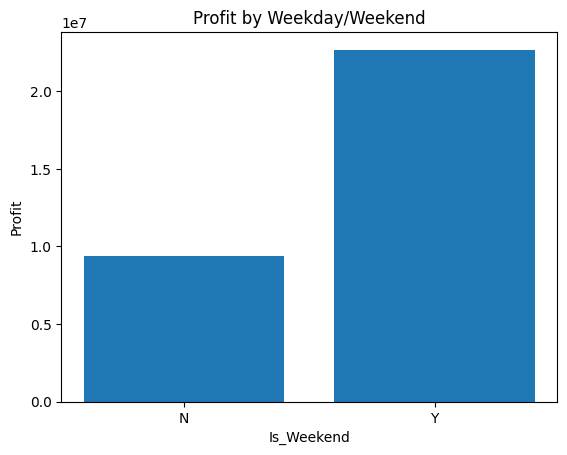

In [ ]:
df_grouped =dfc_new.groupby('Is_Weekend')['Profit'].sum()
df_grouped
plt.bar(df_grouped.index,df_grouped.values)
plt.title("Profit by Weekday/Weekend")
plt.xlabel("Is_Weekend")
plt.ylabel("Profit")

In [ ]:
profit_ratio=round(total_weekend_profit/total_weekday_profit,1)
print("The total profit on weekends is",profit_ratio,"times the profit on weekdays.")


The total profit on weekends is 2.4 times the profit on weekdays.


As per the graph, the weekends profit is higher than the weekdays profit.

**Comparison of  profit between customer's gender**




In [ ]:
dfc_gender =dfc.copy()
dfc_gender
#To get the profit groupby gender
profit_by_gender =dfc_gender.groupby('Customer_Gender')['Profit'].sum()
print('Total Profit for female:',profit_by_gender['F'])
print('Total Profit for male  :',profit_by_gender['M'])

Total Profit for female: 15641819
Total Profit for male  : 16404420


Text(0, 0.5, 'Profit')

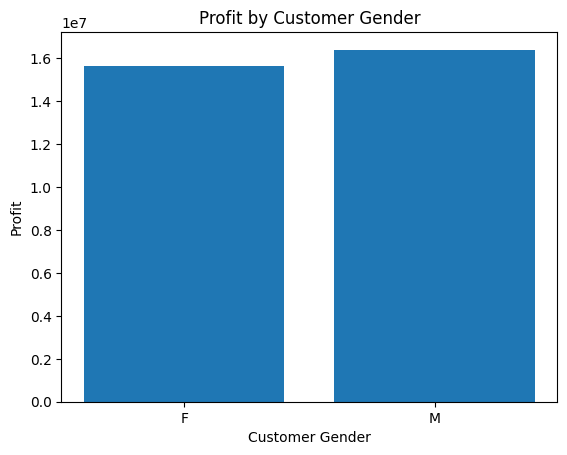

In [ ]:
plt.bar(profit_by_gender.index,profit_by_gender.values)
plt.title("Profit by Customer Gender")
plt.xlabel("Customer Gender")
plt.ylabel("Profit")

In [ ]:
profit_gender_ratio = round(profit_by_gender['M']/profit_by_gender['F'],2)
print("The total profit for male is",profit_gender_ratio,"times the profit for female.")


The total profit for male is 1.05 times the profit for female.


The profit for male is slightly higher compared to female.

**Comparison of profit between customer's age group**

In [ ]:
dfc_age =dfc.copy()
dfc_age
#To get the profit groupby age
profit_by_age =dfc_age.groupby('Age_Group')['Profit'].sum()
profit_by_age

for age_group, profit in profit_by_age.items():
    print("Total Profit for", age_group, ":",profit)
    print()

Total Profit for Adults (35-64) : 16234940

Total Profit for Seniors (64+) : 137609

Total Profit for Young Adults (25-34) : 11314684

Total Profit for Youth (<25) : 4359006



Text(0, 0.5, 'Profit')

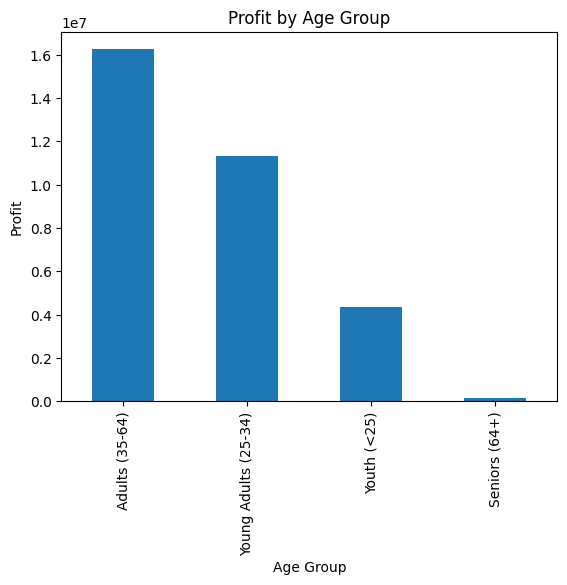

In [ ]:
profit_by_age_sorted =profit_by_age.sort_values(ascending=False)
profit_by_age_sorted
profit_by_age_sorted.plot.bar()
plt.title("Profit by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Profit")

Based on the above graph, adults are the most profitable customers whereas seniors are the least profitable customers.

**To get sales details of negative profits.**

In [ ]:
dfc_country =dfc.copy()

negative_profit=dfc_country[dfc_country['Profit']<0]
negative_profit_country=negative_profit['Country'].unique().tolist()
negative_profit_product=negative_profit['Product'].unique().tolist()

country_list=[]
print("The country which have negative profit among it's daily sales is/are:","\n")
for i in negative_profit_country:
  print(i)
print("\nThe product which have negative profit among it's daily sales is/are:","\n")
for i in negative_profit_product:
  print(i)


The country which have negative profit among it's daily sales is/are: 

France

The product which have negative profit among it's daily sales is/are: 

AWC Logo Cap
Short-Sleeve Classic Jersey, L
Short-Sleeve Classic Jersey, M
Short-Sleeve Classic Jersey, S
Short-Sleeve Classic Jersey, XL


Text(0, 0.5, 'Negative Profit')

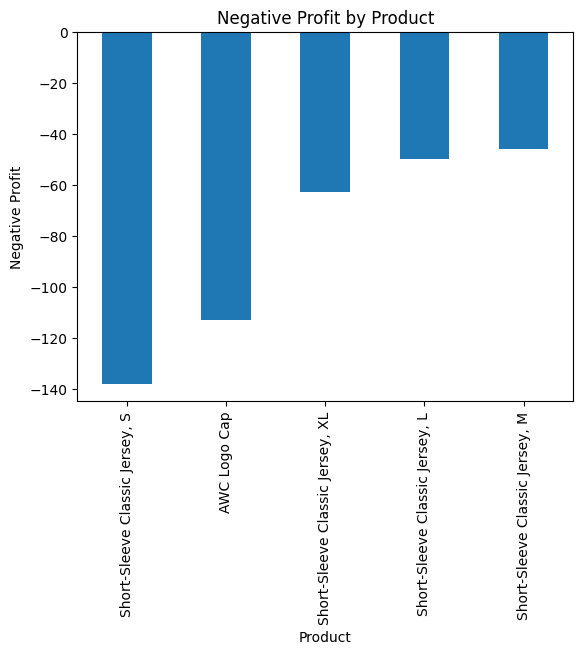

In [ ]:
negative_profit_groupby=negative_profit.groupby('Product')['Profit'].sum()
negative_profit_sorted=negative_profit_groupby.sort_values()

negative_profit_sorted.plot.bar()
plt.title("Negative Profit by Product")
plt.xlabel("Product")
plt.ylabel("Negative Profit")

As per graph above, Short-Sleeve Classic Jersey, S gives the
most negative profits whereas Short-Sleeve Classic Jersey, M
gives the least negative profits.



####2. Determine the highest profit earning product categories, products, months and countries.


In [ ]:
df = dfc.copy()
df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,11/26/2013,26,November,2013,19.0,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,11/26/2015,26,November,2015,19.0,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,3/23/2014,23,March,2014,49.0,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,3/23/2016,23,March,2016,49.0,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,5/15/2014,15,May,2014,47.0,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


##Product Categories


###1. Which product category gives the most profit in each country?

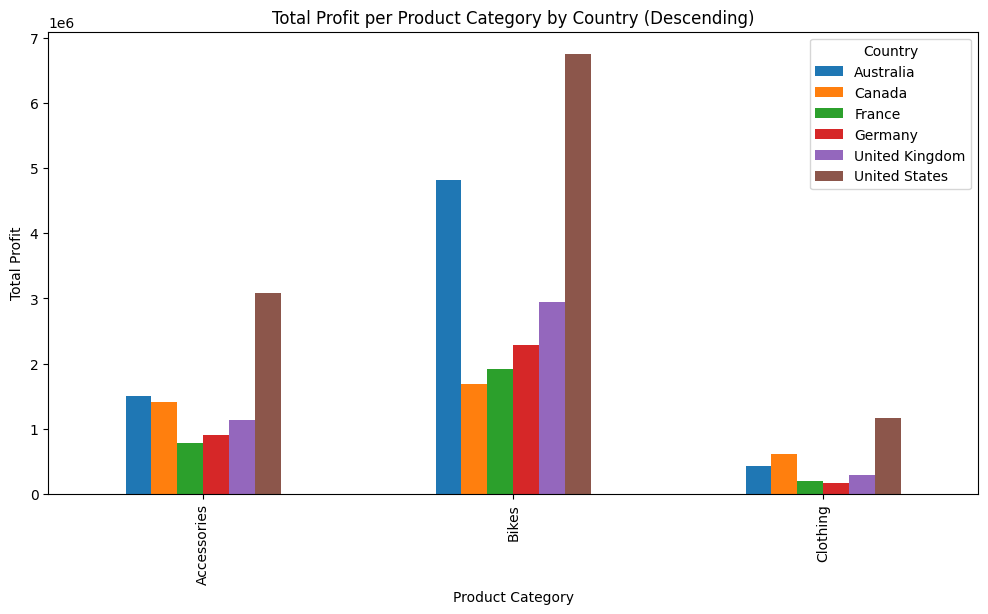

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the data by 'Country', 'Product_Category' and calculate the total profit for each product category
total_profit_per_country_and_category = df.groupby(['Country', 'Product_Category'])['Profit'].sum().reset_index()

# Pivot the data to have countries as columns and product categories as rows
pivot_profit_data = total_profit_per_country_and_category.pivot(index='Product_Category', columns='Country', values='Profit')

# Create a bar plot
ax = pivot_profit_data.plot(kind='bar', figsize=(12, 6), legend=True)

# Customize the plot
ax.set_xlabel('Product Category')
ax.set_ylabel('Total Profit')
ax.set_title('Total Profit per Product Category by Country (Descending)')

# Reduce the size of the x-labels
ax.tick_params(axis='x', labelsize=10)

# Add a legend
ax.legend(title="Country")

# Show the plot
plt.show()


From the graph, we can see that Bikes has the highest profit in each country compared to Accessories and Clothing products.

###2. Which product category gives the most profit across all countries?

Let's get the actual profit in dollars for each category, and then calculate the product category that gives the most profit.

In [ ]:
total_profit_per_category = df.groupby(['Product_Category'])['Profit'].sum()
for row in total_profit_per_category.items():
  { print (f"The total profit for the product category '{row[0]} ' is {row[1]} dollars")
  }
max_profit = total_profit_per_category.idxmax()
max_profit_value = total_profit_per_category[max_profit]
print (f"The highest profit is from the {max_profit} category and the profit value is {max_profit_value} dollars")


The total profit for the product category 'Accessories ' is 8807194 dollars
The total profit for the product category 'Bikes ' is 20399726 dollars
The total profit for the product category 'Clothing ' is 2839319 dollars
The highest profit is from the Bikes category and the profit value is 20399726 dollars


The highest profit is from the Bikes category and the profit value is 20399726 dollars


Product_Category
Accessories     8807194
Bikes          20399726
Clothing        2839319
Name: Profit, dtype: int64


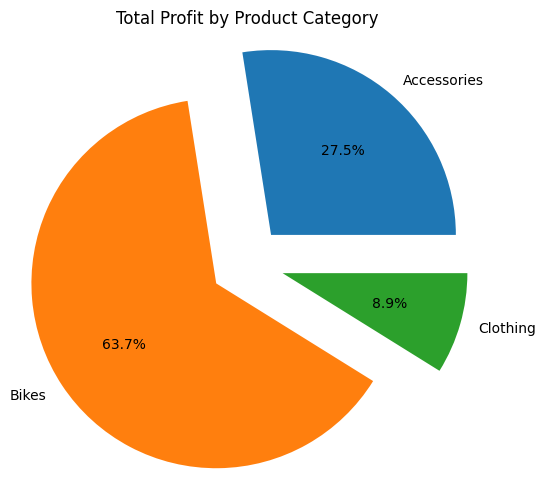

In [ ]:
#按“产品类别”对数据进行分组并汇总“利润”栏
利润_副产品_类别= df.groupby('产品_类别')[“利润”].总和()

打印(利润_副产品_类别)

进口matplotlib.pyplot如同plt

#创建饼图
profits _ by _ product _ category . plot . pie(autopct =%1.1f%% '，爆炸=(0.2, 0.2, 0.2)，figsize=(10, 6))

#自定义情节
工厂名称('按产品类别划分的总利润')
plt.ylabel('')  #隐藏“利润”标签

#展示剧情
plt.show()

The highest profit is from the Bikes category which is 63.7% of the total profit.

###2. Which product category gives the lowest profit across all countries?

Clothing is the lowest profitable product category contributing only 8.9% of the total profit.

The value of the profit from Clothing category is 28,39,319 dollars.

## Products


### 3. Which product generates most profits across all countries and product categories?
a. Which product generates the highest profit?

b. Which product generates the least profit?

c. What is the profit generated by each product?


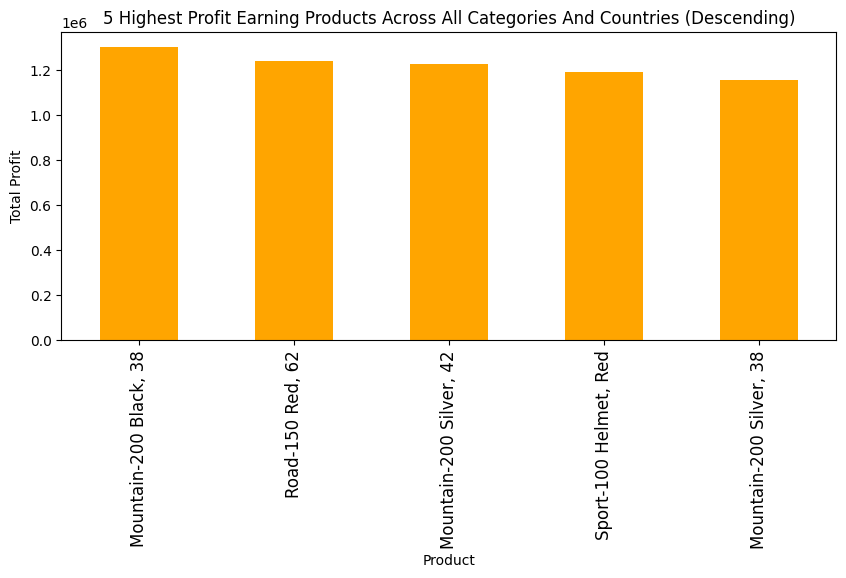

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Group the data by 'Product' and calculate the total profit for each product
total_profit_per_product = df.groupby('Product')['Profit'].sum()

# Sort the data by profit in descending order
sorted_total_profit_per_product = total_profit_per_product.sort_values(ascending=False).head(5)

# Create a bar plot
ax = sorted_total_profit_per_product.plot(kind='bar', figsize=(10, 4), color='orange')

# Customize the plot
ax.set_xlabel('Product')
ax.set_ylabel('Total Profit')
ax.set_title('5 Highest Profit Earning Products Across All Categories And Countries (Descending)')

# Reduce the size of the x-labels
ax.tick_params(axis='x', labelsize=12)

# Show the plot
plt.show()


The highest profit was generated by Mountain-200 Black, 38 Bike.

### 4. Which product generated the highest profit across all countries in each product category?

  a. List the top 5 products that generated the highest profit.


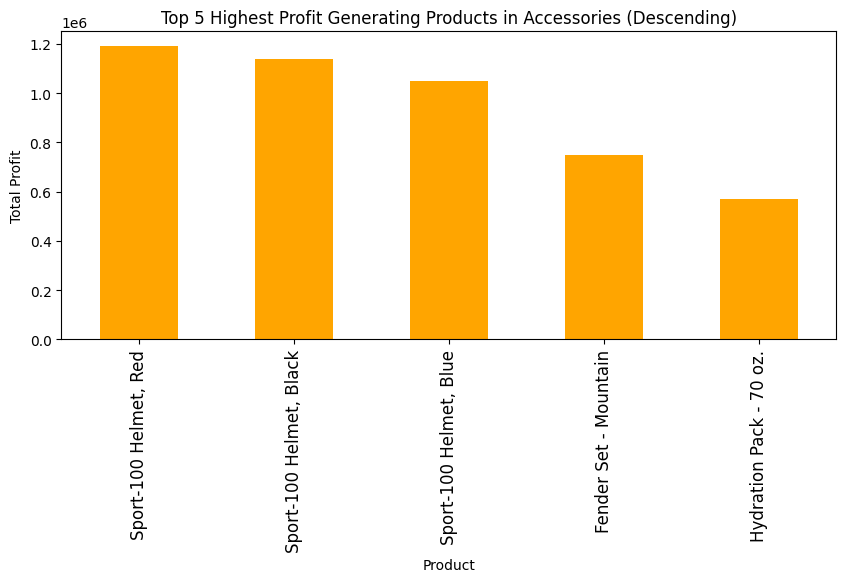

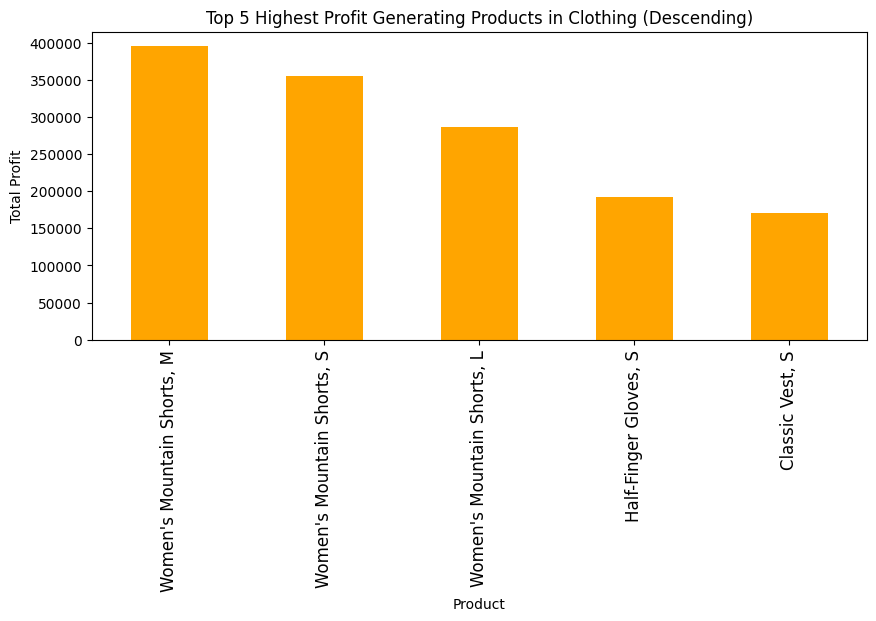

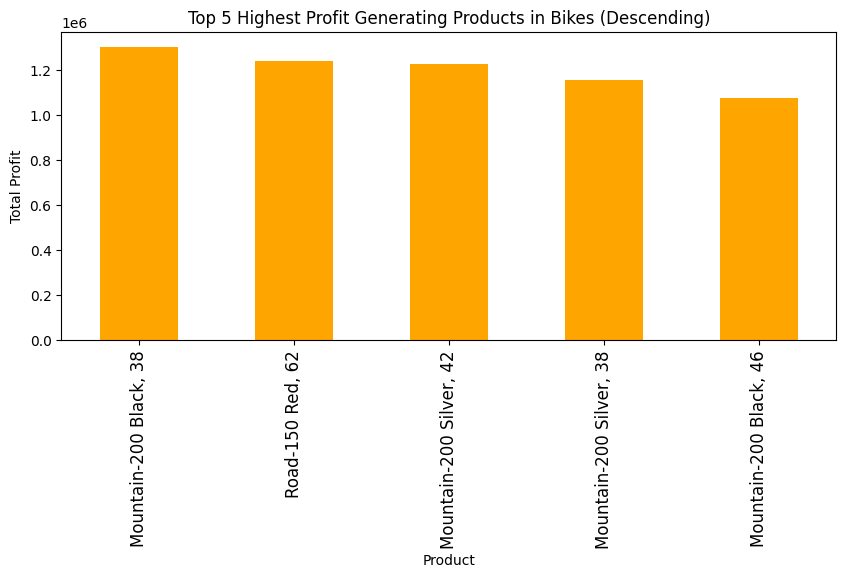

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the data by 'Product_Category', 'Product' and calculate the total profit for each product
total_profit_per_category_and_product = df.groupby(['Product_Category', 'Product'])['Profit'].sum().reset_index()

# Get unique product categories
unique_product_categories = df['Product_Category'].unique()

# Create a bar plot for each product category
for category in unique_product_categories:
    category_data = total_profit_per_category_and_product[total_profit_per_category_and_product['Product_Category'] == category]

    # Sort the data by profit in descending order
    sorted_category_data = category_data.sort_values(by='Profit', ascending=False).head(5)

    # Create a bar plot
    ax = sorted_category_data.plot(x='Product', y='Profit', kind='bar', figsize=(10, 4), color='orange', legend=None)

    # Customize the plot
    ax.set_xlabel('Product')
    ax.set_ylabel('Total Profit')
    ax.set_title(f'Top 5 Highest Profit Generating Products in {category} (Descending)')

    # Reduce the size of the x-labels
    ax.tick_params(axis='x', labelsize=12)

    # Show the plot
    plt.show()



In bikes, the highest profit was generated by Mountain-200 Black, 38

In clothing, the highest profit was generated by Women's Mountain Shorts, M

In accessories, the highest profit was generated by Sports-100 Helmet, Red

  b. List the 5 products that generated the least profit.


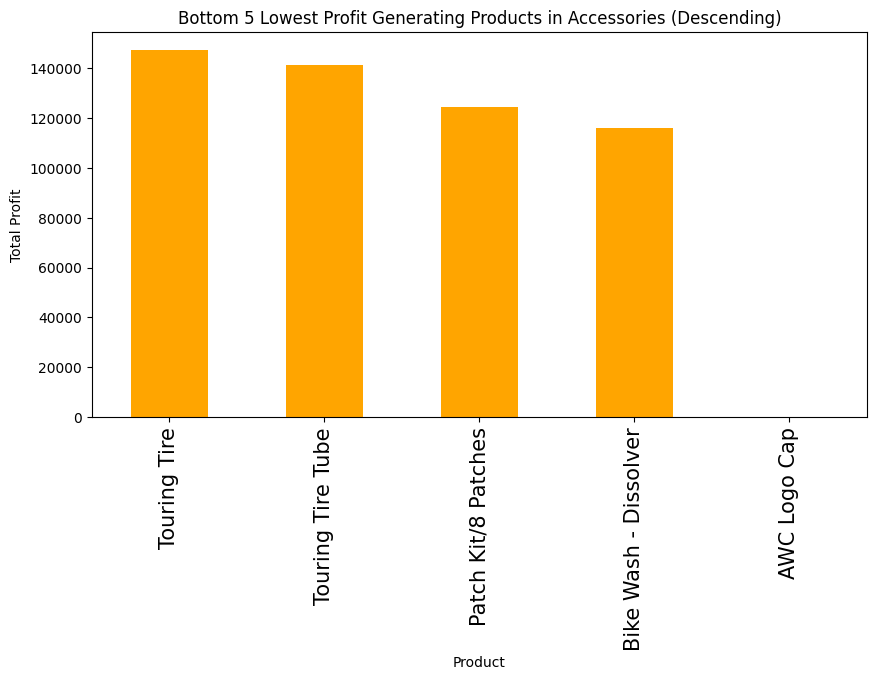

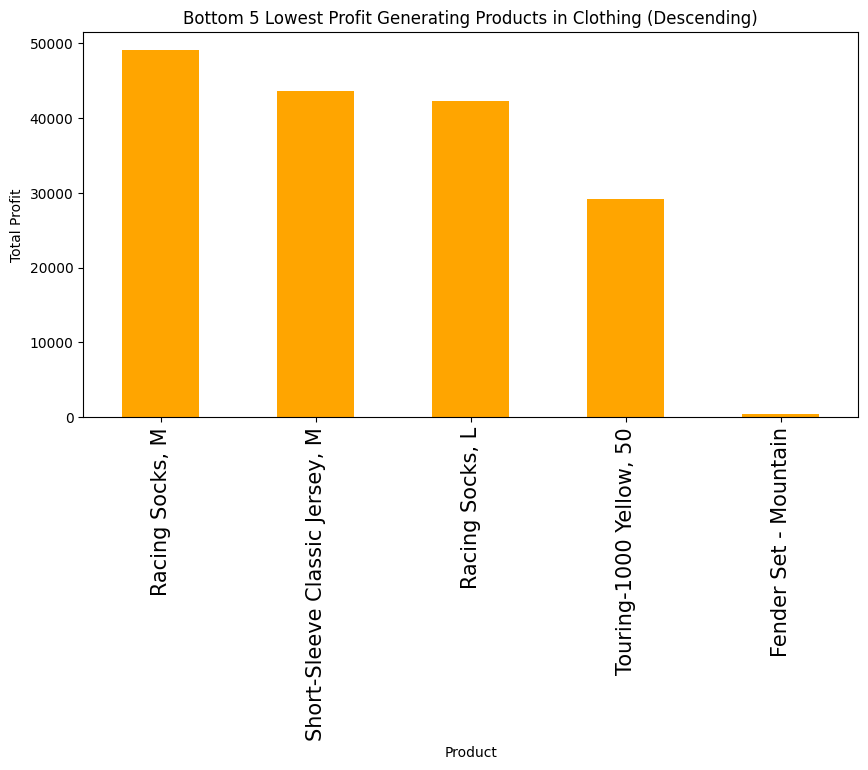

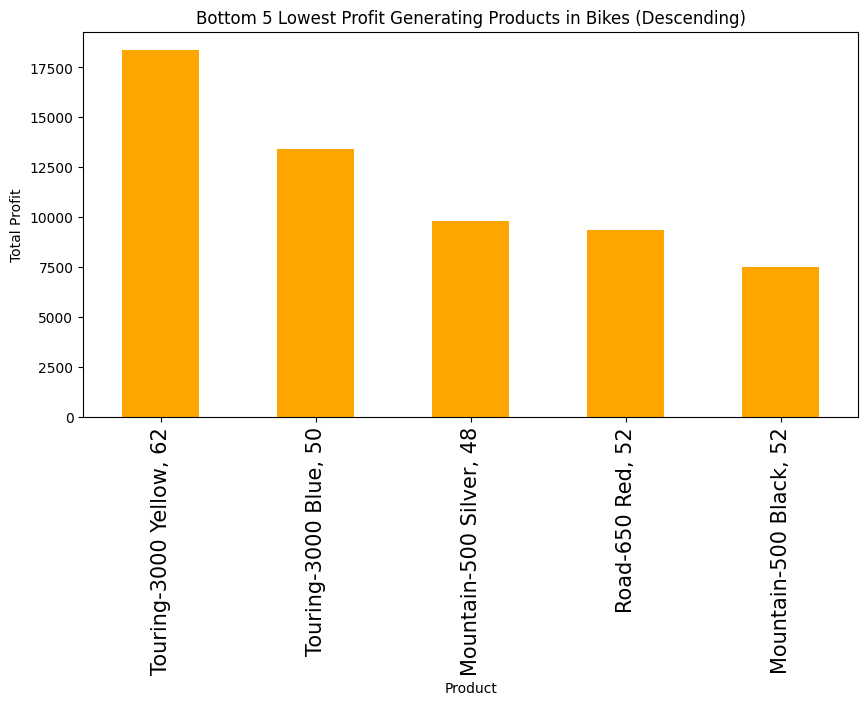

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the data by 'Product_Category', 'Product' and calculate the total profit for each product
total_profit_per_category_and_product = df.groupby(['Product_Category', 'Product'])['Profit'].sum().reset_index()

# Get unique product categories
unique_product_categories = df['Product_Category'].unique()

for category in unique_product_categories:
    category_data = total_profit_per_category_and_product[total_profit_per_category_and_product['Product_Category'] == category]

    # Sort the data by profit in ascending order
    sorted_category_data = category_data.sort_values(by='Profit', ascending=False).tail(5)

    # Create a bar plot
    ax = sorted_category_data.plot(x='Product', y='Profit', kind='bar', figsize=(10, 5), color='orange', legend=None)

    # Customize the plot
    ax.set_xlabel('Product')
    ax.set_ylabel('Total Profit')
    ax.set_title(f'Bottom 5 Lowest Profit Generating Products in {category} (Descending)')

    # Reduce the size of the x-labels
    ax.tick_params(axis='x', labelsize=15)

    # Show the plot
    plt.show()

In accessories, the least profit was generated by AWC Logo Cap.

In clothing, the least profit was generated by Fender Set - Mountain.

In bikes, the least profit was generated by Mountain-500 Black, 52.

###5. Which product generated the highest profit in each country across all product categories?

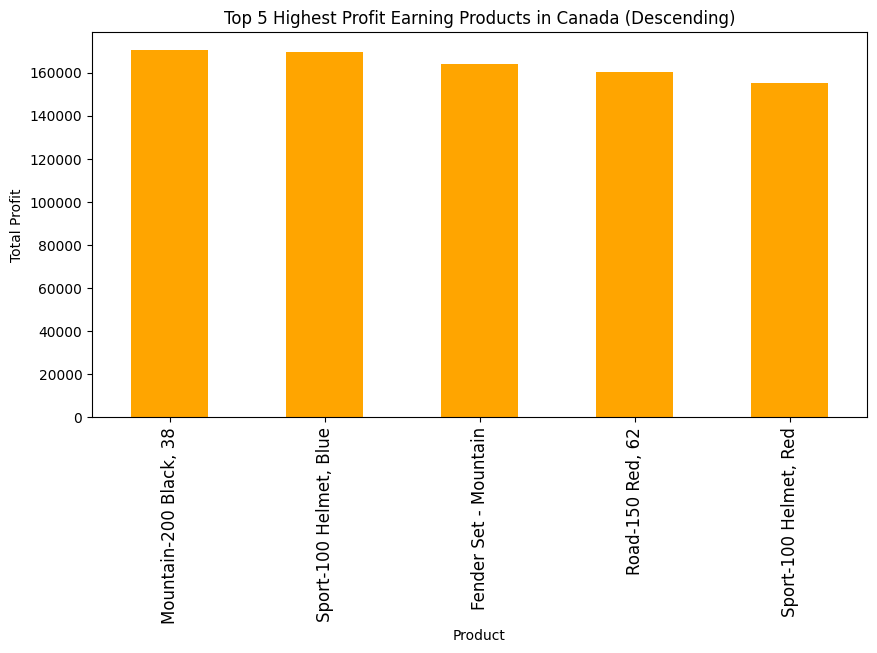

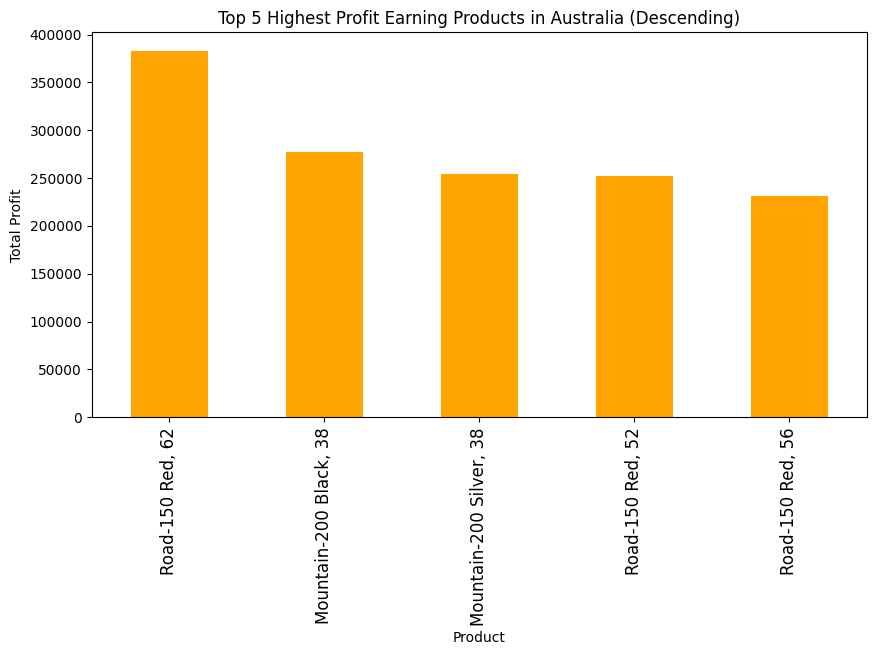

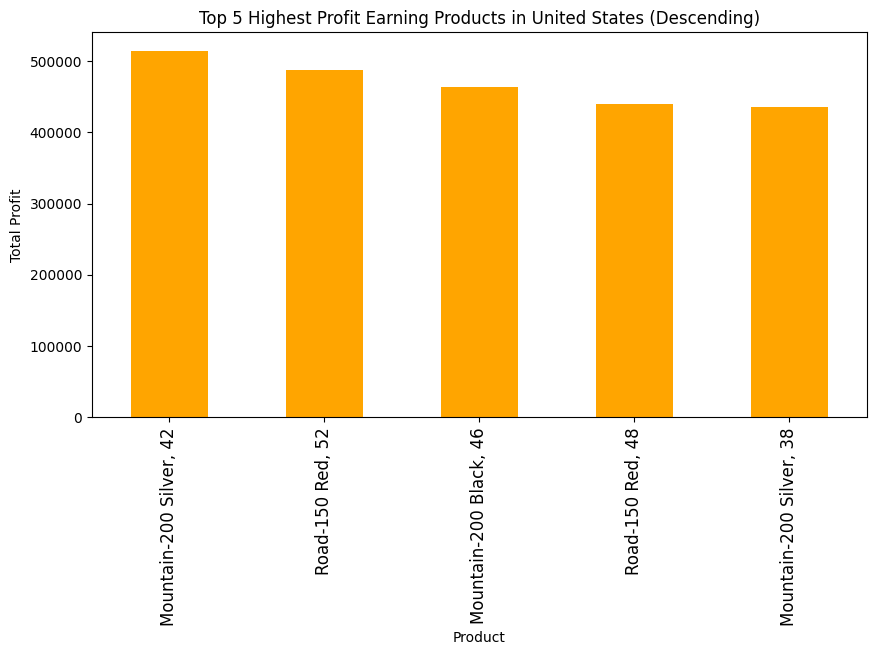

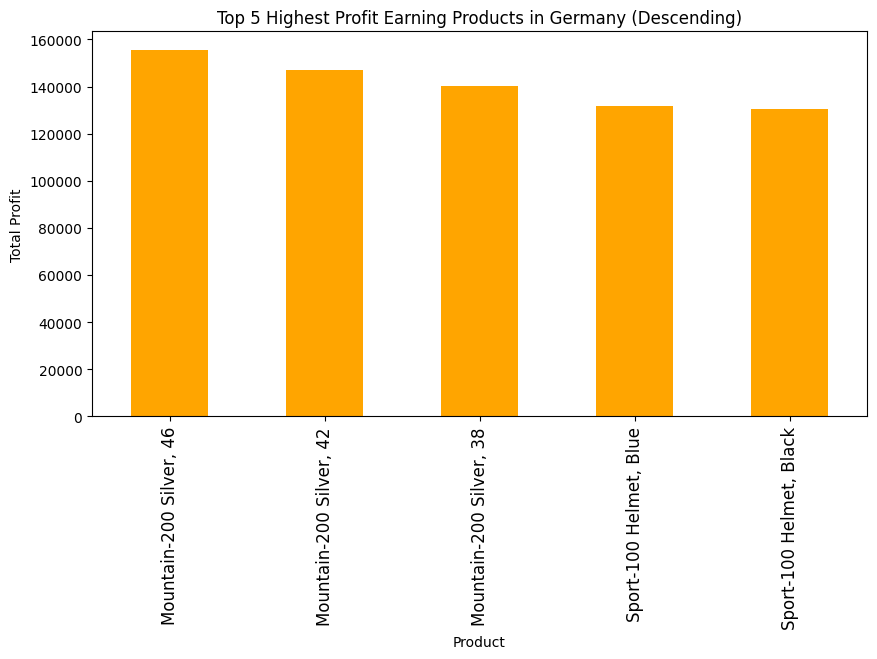

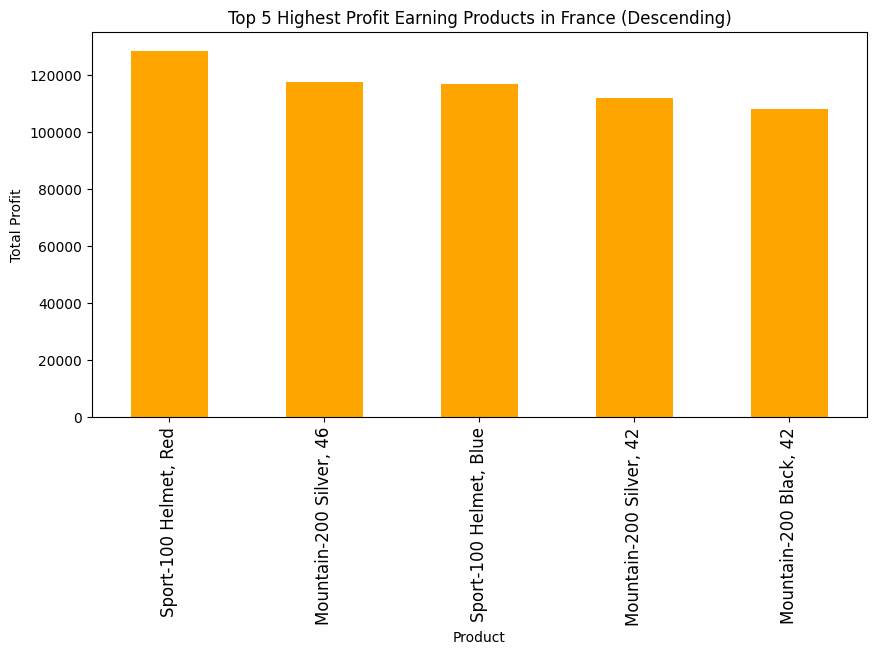

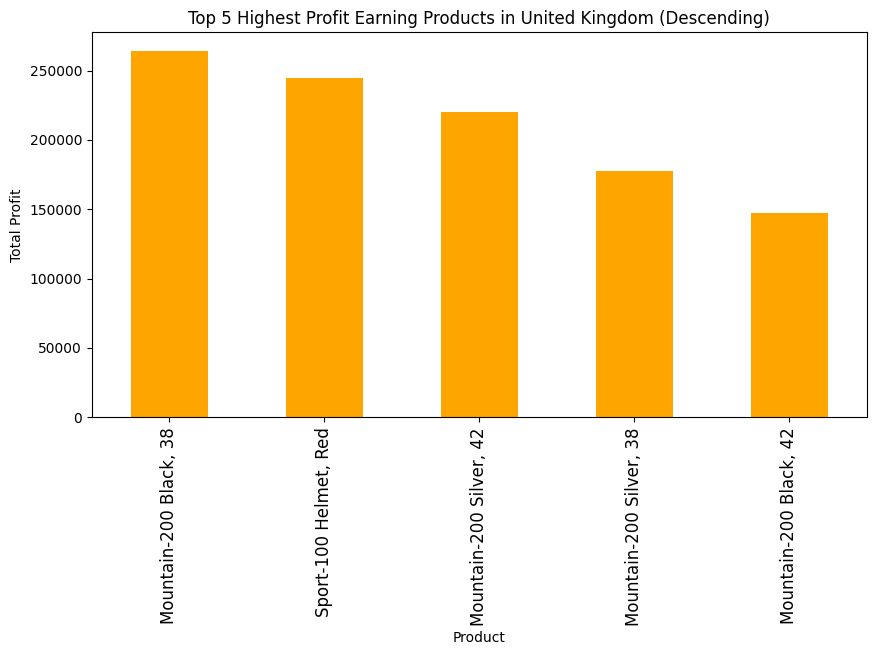

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you've already created the dataframe named df

# Group the data by 'Country', 'Product' and calculate the total profit for each product
total_profit_per_country_and_product = df.groupby(['Country', 'Product'])['Profit'].sum().reset_index()

# Get unique countries
unique_countries = df['Country'].unique()

# Create a bar plot for each country
for country in unique_countries:
    country_data = total_profit_per_country_and_product[total_profit_per_country_and_product['Country'] == country]

    # Sort the data by profit in descending order
    sorted_country_data = country_data.sort_values(by='Profit', ascending=False).head(5)

    # Create a bar plot
    ax = sorted_country_data.plot(x='Product', y='Profit', kind='bar', figsize=(10, 5), color='orange', legend=None)

    # Customize the plot
    ax.set_xlabel('Product')
    ax.set_ylabel('Total Profit')
    ax.set_title(f'Top 5 Highest Profit Earning Products in {country} (Descending)')

    # Reduce the size of the x-labels
    ax.tick_params(axis='x', labelsize=12)

    # Show the plot
    plt.show()


In Canada, the highest profit was generated by Mountain 200, Black - 38

In Australia, the highest profit was generated by Road-150 Red - 62

In USA, the highest profit was generated by Mountain 200, Silver - 42

In France, the highest profit was generated by Sport 100, Helmet - Red

In Germany, the highest profit was generated by Mountain 200, Silver - 42

In UK, the highest profit was generated by Mountain 200, Black - 38

  b. Which product generated the least profit?

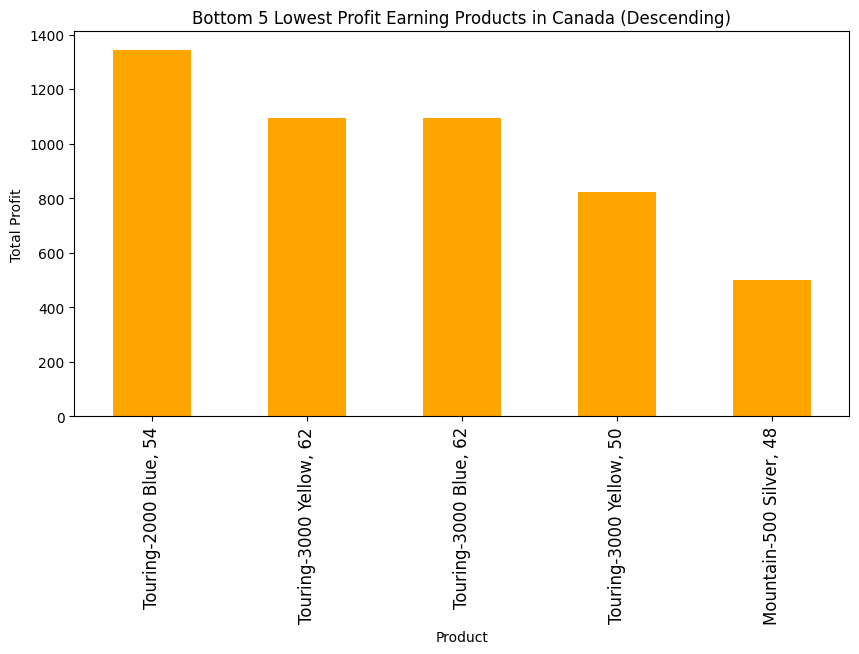

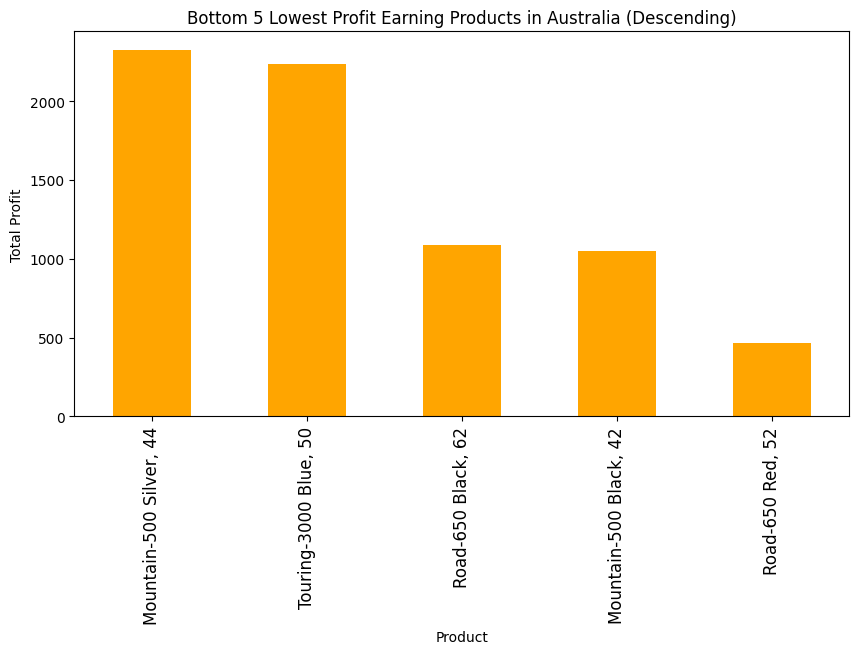

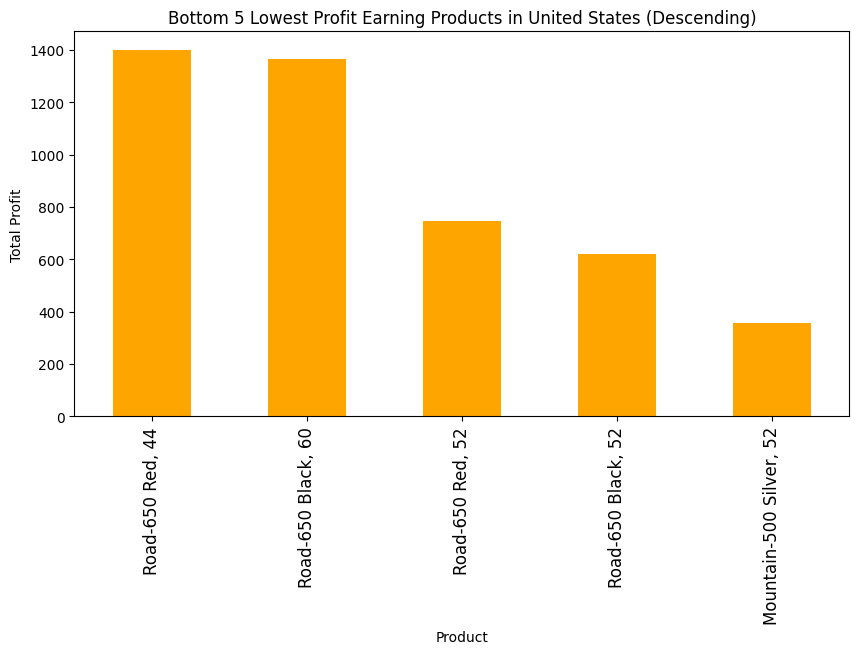

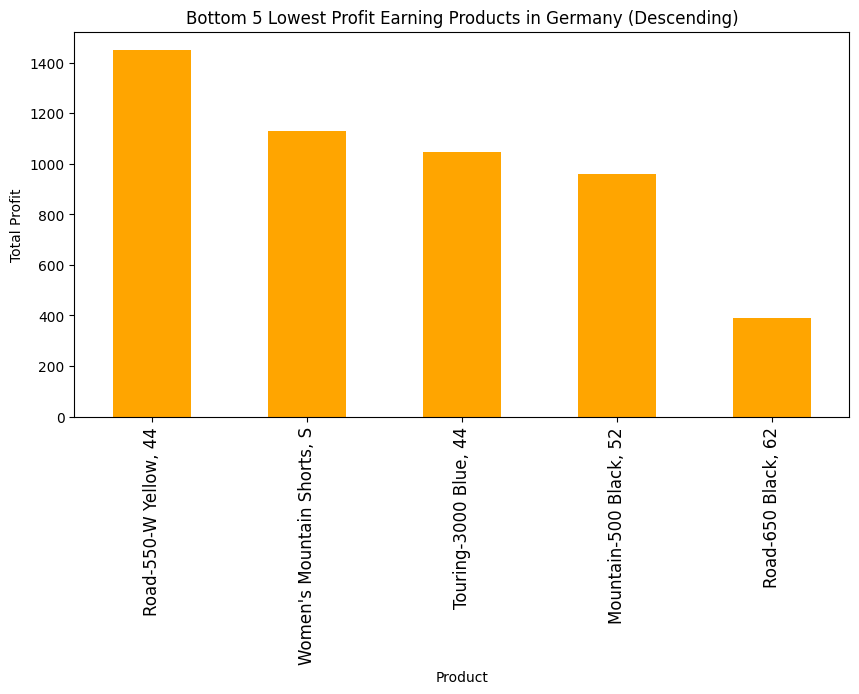

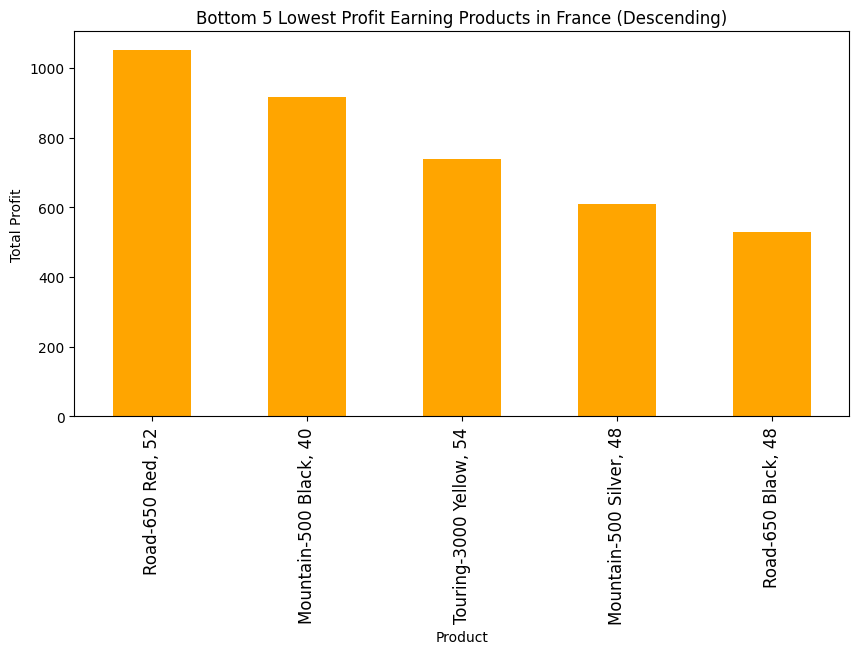

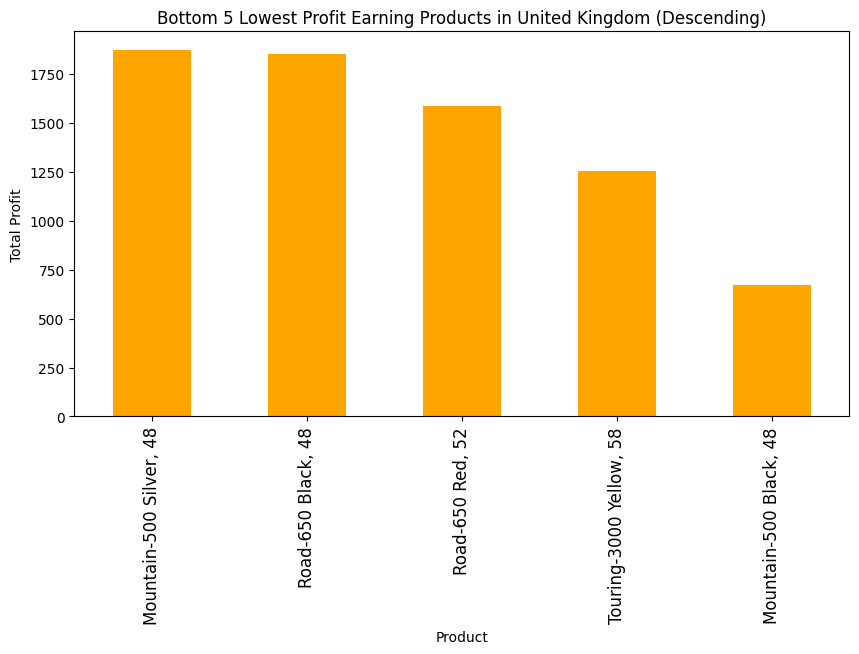

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you've already created the dataframe named df

# Group the data by 'Country', 'Product' and calculate the total profit for each product
total_profit_per_country_and_product = df.groupby(['Country', 'Product'])['Profit'].sum().reset_index()

# Get unique countries
unique_countries = df['Country'].unique()

# Create a bar plot for each country
for country in unique_countries:
    country_data = total_profit_per_country_and_product[total_profit_per_country_and_product['Country'] == country]

    # Sort the data by profit in descending order
    sorted_country_data = country_data.sort_values(by='Profit', ascending=False).tail(5)

    # Create a bar plot
    ax = sorted_country_data.plot(x='Product', y='Profit', kind='bar', figsize=(10, 5), color='orange', legend=None)

    # Customize the plot
    ax.set_xlabel('Product')
    ax.set_ylabel('Total Profit')
    ax.set_title(f'Bottom 5 Lowest Profit Earning Products in {country} (Descending)')

    # Reduce the size of the x-labels
    ax.tick_params(axis='x', labelsize=12)

    # Show the plot
    plt.show()


In Canada, the lowest profit was generated by Mountain-500 Silver, 48

In Australia, the lowest profit was generated by Road-650 Red, 52

In USA, the lowest profit was generated by Mountain - 500 Silver, 52

In France, the lowest profit was generated by Road - 650 Black, 48

In Germany, the lowest profit was generated by Road - 650, Black, 62

In UK, the lowest profit was generated by Mountain 500, Black - 48

##Month and Year

###6. Which year and month had the highest profit?

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
# Group the data by year and month and sum the profit
profit_by_year_and_month = df.groupby([df['Date'].dt.year, df['Date'].dt.month])['Profit'].sum()

# Find the year and month with the highest profit
max_profit_year, max_profit_month = profit_by_year_and_month.idxmax()

print(f"The month with the highest profit was {max_profit_month}/{max_profit_year}.")

The month with the highest profit was 12/2015.


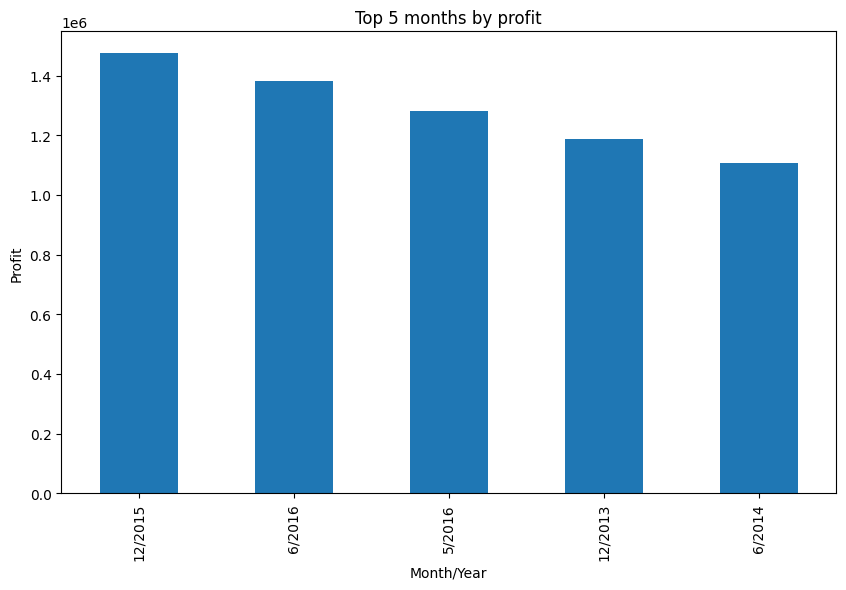

In [ ]:
import matplotlib.pyplot as plt

# Sort the Series in descending order and take the first 5
top_5_months = profit_by_year_and_month.sort_values(ascending=False).head(5)

# Convert the multiindex into a string that can be displayed on the x-axis
top_5_months.index = top_5_months.index.map(lambda x: f"{x[1]}/{x[0]}")  # converts (year, month) to 'month/year'

# Create a bar plot
top_5_months.plot(kind='bar', figsize=(10,6))
plt.title('Top 5 months by profit')
plt.xlabel('Month/Year')
plt.ylabel('Profit')
plt.show()


The month with the highest profit was December, 2015.

###2. In each year, which month had the highest profit and which month had the lowest profit?




In [ ]:
# Group the data by year and month and sum the profits
profits_by_year_month = df.groupby([df['Date'].dt.year, df['Date'].dt.month])['Profit'].sum()

# Find the index (year, month) of the maximum profit for each year
max_profits_by_year_month = profits_by_year_month.groupby(level=0).idxmax()

# Print the results
for year, month in max_profits_by_year_month:
    print(f'The month with the highest profit in {year} was {month}')

The month with the highest profit in 2011 was 12
The month with the highest profit in 2012 was 12
The month with the highest profit in 2013 was 12
The month with the highest profit in 2014 was 6
The month with the highest profit in 2015 was 12
The month with the highest profit in 2016 was 6


The data for the years 2014 and 2016 is not present for all the months. So, we analyze the data for the years 2011, 2012, 2013 and 2015 to find the highest profitable month and lowest profitable month.

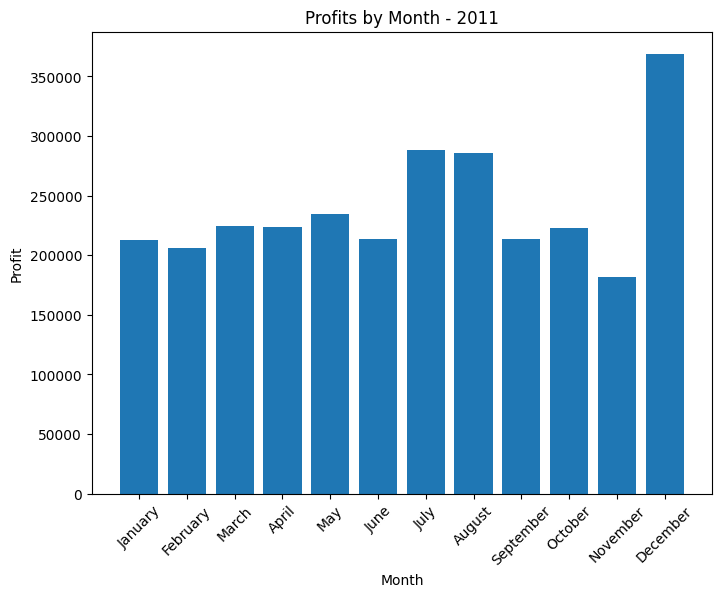

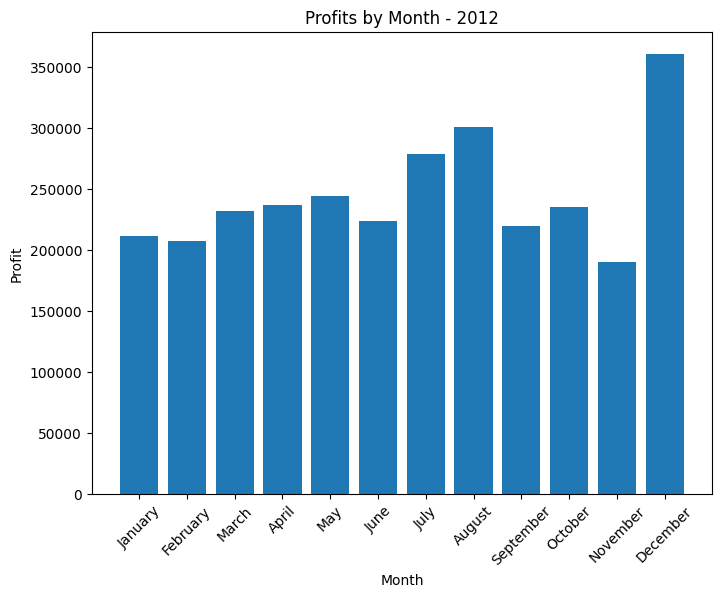

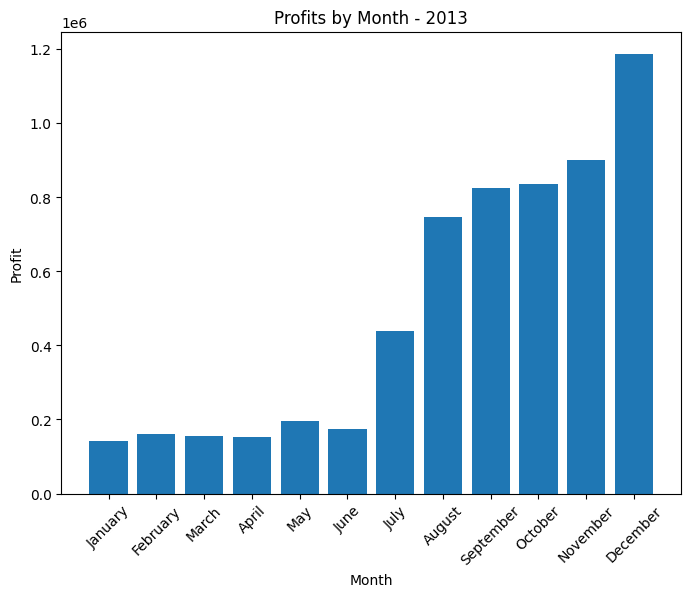

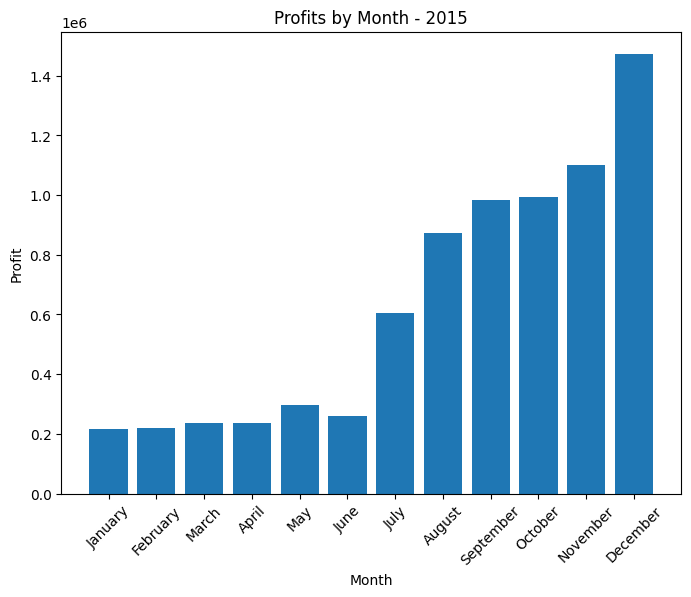

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar

# Group the data by year and month and sum the profit
profits_by_year_month = df.groupby([df['Date'].dt.year, df['Date'].dt.month])['Profit'].sum()

# Get the unique years excluding 2014 and 2016
years = profits_by_year_month.index.get_level_values(0).unique()
years_to_exclude = [2014, 2016]
filtered_years = [year for year in years if year not in years_to_exclude]

# Get the names of the months
month_names = [calendar.month_name[i] for i in range(1, 13)]

# Create separate plots for each year except 2014 and 2016
for year in filtered_years:
    # Filter the data for the current year
    year_data = profits_by_year_month.loc[year]

    # Create a new plot for the current year
    fig, ax = plt.subplots(figsize=(8, 6))

    # Plot the data for the current year
    ax.bar(month_names, year_data)

    # Set the title, x-axis label, and y-axis label
    ax.set_title(f'Profits by Month - {year}')
    ax.set_xlabel('Month')
    ax.set_ylabel('Profit')

    # Rotate the x-axis tick labels for better visibility
    plt.xticks(rotation=45)

    # Show the plot
    plt.show()



##Highest Profitable Month
In the years 2011, 2012, 2013 and 2015, December was the highest profitable month.





## Lowest Profitable Month
In the year 2011, November was the lowest profitable month.

In the year 2012, November was the lowest profitable month.

In the year 2013, January was the lowest profitable month.

In the year 2015, January was the lowest profitable month.

###3. Which year had the highest profit?

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Group the data by year and sum up the profits
profits_by_year = df.groupby(df['Date'].dt.year)['Profit'].sum()

# Find the year with the maximum total profit
year_with_highest_profit = profits_by_year.idxmax()

print(f"The year with the highest profit is {year_with_highest_profit}")

The year with the highest profit is 2015


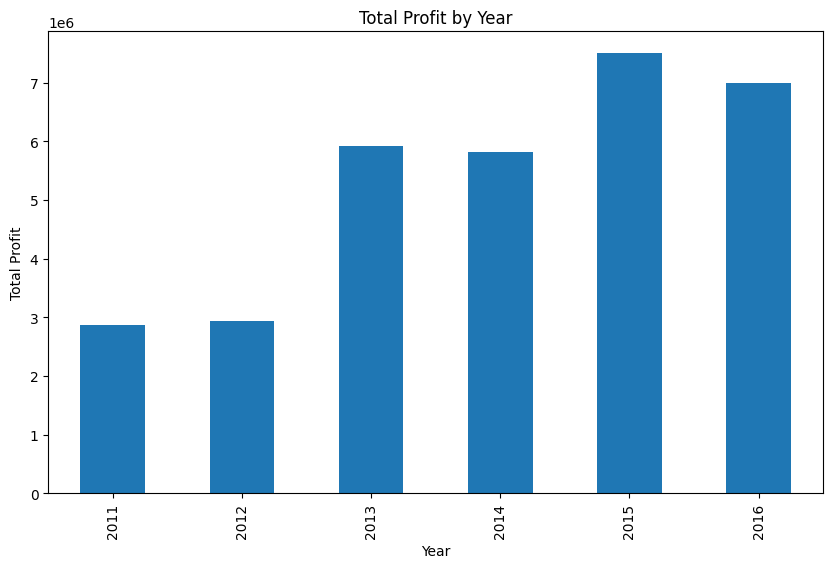

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you've already created the dataframe named df
# Group the data by year and sum the profits
profits_by_year = df.groupby(df['Date'].dt.year)['Profit'].sum()

# Create a bar chart
ax = profits_by_year.plot(kind='bar', figsize=(10, 6))

# Customize the plot
ax.set_xlabel('Year')
ax.set_ylabel('Total Profit')
ax.set_title('Total Profit by Year')

# Show the plot
plt.show()


Year 2015 had the highest profit.

##Countries


###7. Which country generated the highest profit across all product categories?

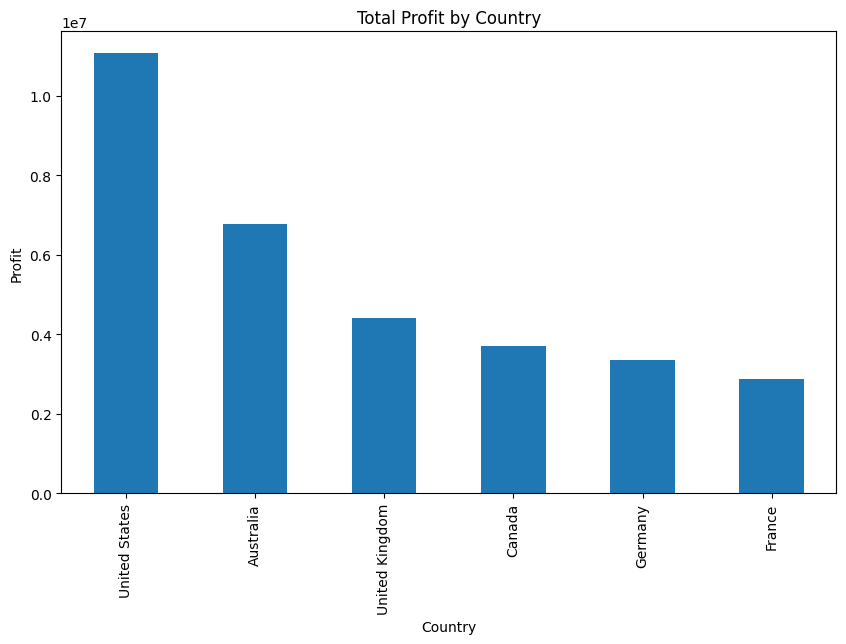

In [ ]:
import matplotlib.pyplot as plt

# Sort the data by 'Profit' in descending order
profits_by_country = profits_by_country.sort_values(ascending=False)

# Create a bar plot
profits_by_country.plot(kind='bar', figsize=(10, 6))

# Customize the plot
plt.title('Total Profit by Country')
plt.xlabel('Country')
plt.ylabel('Profit')

# Show the plot
plt.show()


United States generated the highest profit and France generated the least profit.

# **Data Preparation**

## Clean Data

Data has already been cleaned before Exploratory Data Analysis.

## Construct Data

Is_Weekend attribute is derived from Date attribute in data exploration stage for weekend and weekday sales trend analysis.

Month attribute values have been converted from categorical to numerical values.

In [ ]:
dfc['Month'].unique()

array(['November', 'March', 'May', 'February', 'July', 'August',
       'September', 'January', 'December', 'June', 'October', 'April'],
      dtype=object)

In [ ]:
# convert from categorical to numerical values
dfc['Month'] = dfc['Month'].replace(['January'], '1')
dfc['Month'] = dfc['Month'].replace(['February'], '2')
dfc['Month'] = dfc['Month'].replace(['March'], '3')
dfc['Month'] = dfc['Month'].replace(['April'], '4')
dfc['Month'] = dfc['Month'].replace(['May'], '5')
dfc['Month'] = dfc['Month'].replace(['June'], '6')
dfc['Month'] = dfc['Month'].replace(['July'], '7')
dfc['Month'] = dfc['Month'].replace(['August'], '8')
dfc['Month'] = dfc['Month'].replace(['September'], '9')
dfc['Month'] = dfc['Month'].replace(['October'], '10')
dfc['Month'] = dfc['Month'].replace(['November'], '11')
dfc['Month'] = dfc['Month'].replace(['December'], '12')

In [ ]:
dfc['Month'].unique()

array(['11', '3', '5', '2', '7', '8', '9', '1', '12', '6', '10', '4'],
      dtype=object)

## Integrate Data

Integrate data step can used to combine information from multiple tables or records to create new records or values which is not required in our project because we have only one data source/table.

## Format Data

In [ ]:
# convert data type to numerical data type
dfc["Month"] = dfc['Month'].astype('int')
dfc["Customer_Age"] = dfc['Customer_Age'].astype('int')
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              112036 non-null  object
 1   Day               112036 non-null  int64 
 2   Month             112036 non-null  int64 
 3   Year              112036 non-null  int64 
 4   Customer_Age      112036 non-null  int64 
 5   Age_Group         112036 non-null  object
 6   Customer_Gender   112036 non-null  object
 7   Country           112036 non-null  object
 8   State             112036 non-null  object
 9   Product_Category  112036 non-null  object
 10  Sub_Category      112036 non-null  object
 11  Product           112036 non-null  object
 12  Order_Quantity    112036 non-null  int64 
 13  Unit_Cost         112036 non-null  int64 
 14  Unit_Price        112036 non-null  int64 
 15  Profit            112036 non-null  int64 
 16  Cost              112036 non-null  int

## Select Data

In [ ]:
# Day and order quantity attributes are not useful for profit prediction
# Cost attribute can be used instead of unit cost, unit price and revenue attributes
# for modeling according to domain knowledge. It will also reduce data for modeling phase
df = dfc.copy()
df.drop('Day',axis =1,inplace=True)
df.drop('Order_Quantity',axis =1,inplace=True)
df.drop('Unit_Cost',axis =1,inplace=True)
df.drop('Unit_Price',axis =1,inplace=True)
df.drop('Revenue',axis =1,inplace=True)

df_bike = df.select_dtypes(exclude=['object']).copy()
df_bike['Customer_Gender'] = df['Customer_Gender']
df_bike['Country'] = df['Country']
df_bike['Product_Category'] = df['Product_Category']
df_bike = pd.get_dummies(df_bike)
df_bike

,Month,Year,Customer_Age,Profit,Cost,Customer_Gender_F,Customer_Gender_M,Country_Australia,Country_Canada,Country_France,Country_Germany,Country_United Kingdom,Country_United States,Product_Category_Accessories,Product_Category_Bikes,Product_Category_Clothing
0,11,2013,19,590,360,0,1,0,1,0,0,0,0,1,0,0
1,11,2015,19,590,360,0,1,0,1,0,0,0,0,1,0,0
2,3,2014,49,1366,1035,0,1,1,0,0,0,0,0,1,0,0
3,3,2016,49,1188,900,0,1,1,0,0,0,0,0,1,0,0
4,5,2014,47,238,180,1,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,4,2016,41,112,72,0,1,0,0,0,0,1,0,0,0,1
113032,4,2014,18,655,528,0,1,1,0,0,0,0,0,0,0,1
113033,4,2016,18,655,528,0,1,1,0,0,0,0,0,0,0,1
113034,3,2014,37,684,576,1,0,0,0,1,0,0,0,0,0,1


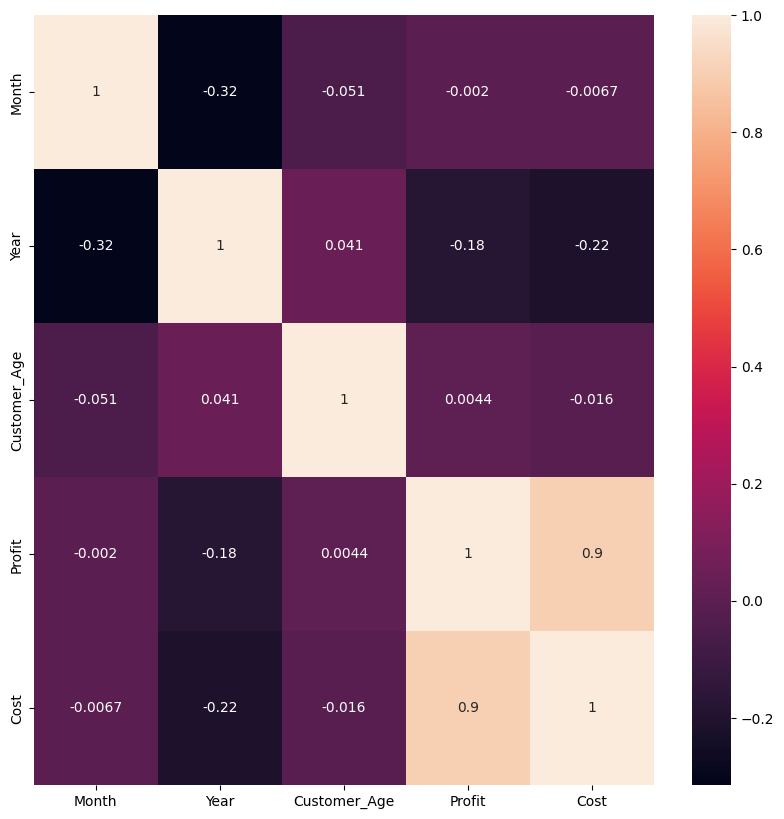

In [ ]:
corr = df.corr()
cp = sns.heatmap(corr, annot=True)
plt.gcf().set_size_inches(10,10)

Feature: 0, Score: 0.00011
Feature: 1, Score: 0.00009
Feature: 2, Score: 0.00077
Feature: 3, Score: 0.95790
Feature: 4, Score: 0.00004
Feature: 5, Score: 0.00001
Feature: 6, Score: 0.01931
Feature: 7, Score: 0.00560
Feature: 8, Score: 0.00394
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00256
Feature: 11, Score: 0.00002
Feature: 12, Score: 0.00756
Feature: 13, Score: 0.00024
Feature: 14, Score: 0.00185


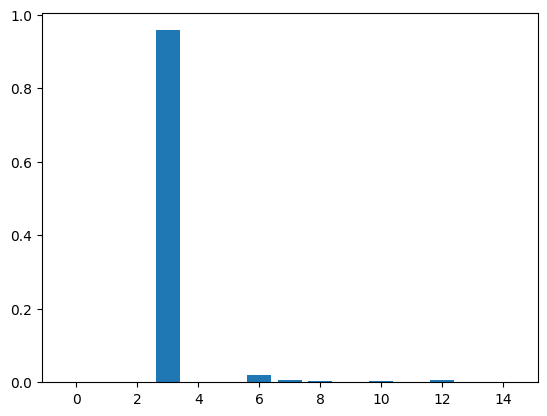

In [ ]:
# Feature selection
X, y = df_bike.drop('Profit',axis=1), df_bike['Profit']

td = DecisionTreeRegressor(random_state=300,max_depth=8)
td.fit(X,y)

# get importance
importance = td.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Cost is the only highly correlated feature for profit.

# **Machine Learning Modeling**

## Select Modeling Technique

1.  Linear Regression
2.  Polynomial Regression
3.  Decision Tree Regression

## Generate Test Design

Splitting data into training and testing sets


In [ ]:
df_bike_model = df_bike[df_bike['Year'] != 2016]
df_bike_test = df_bike[df_bike['Year'] == 2016]

## Build and Assess Model

### Modeling using Cost Feature

Splitting data into training, validation and testing sets


In [ ]:
X, y = df_bike_model['Cost'], df_bike_model['Profit'] # train
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.2, random_state=300)
X_test, y_test = df_bike_test['Cost'], df_bike_test['Profit']

#### Data Scaling

In [ ]:
scaler = StandardScaler()

X_train_scaled =scaler.fit_transform(X_train.values.reshape(-1, 1))
X_val_scaled = scaler.transform(X_val.values.reshape(-1, 1))
X_test_scaled = scaler.transform(X_test.values.reshape(-1, 1))

#### Linear Regression

In [ ]:
lm = LinearRegression().fit(X_train_scaled,y_train)
print("Linear Regression Training Score: ", round(lm.score(X_train_scaled,y_train),2))

Linear Regression Training Score:  0.81


#### Second Degree Polynomial Regression

In [ ]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train.values.reshape(-1, 1))
lm_poly = LinearRegression().fit(X_train_poly,y_train)
print("Second Degree Polynomial Regression Training Score: ", round(lm_poly.score (X_train_poly,y_train),2))

Second Degree Polynomial Regression Training Score:  0.82


#### Third Degree Polynomial Regression

In [ ]:
poly3 = PolynomialFeatures(degree=3)
X_train_poly3 = poly3.fit_transform(X_train.values.reshape(-1, 1))
lm_poly3 = LinearRegression().fit(X_train_poly3,y_train)
print("Third Degree Polynomial Regression Training Score: ", round(lm_poly3.score (X_train_poly3,y_train),2))

Third Degree Polynomial Regression Training Score:  0.82


#### Decision Tree Regression

In [ ]:
td = DecisionTreeRegressor(random_state=300,max_depth=8)
td.fit(X_train.values.reshape(-1, 1),y_train.values.reshape(-1, 1))
print("Decision Tree Regression Training Score: ", round(td.score(X_train.values.reshape(-1, 1),y_train.values.reshape(-1, 1)),2))

Decision Tree Regression Training Score:  0.88


In [ ]:
print("Decision Tree Regression Validation Score: ", round(td.score(X_val.values.reshape(-1, 1),y_val.values.reshape(-1, 1)),2))

Decision Tree Regression Validation Score:  0.89


In [ ]:
print("Decision Tree Regression Testing Score: ", round(td.score(X_test.values.reshape(-1, 1),y_test.values.reshape(-1, 1)),2))

Decision Tree Regression Testing Score:  0.88


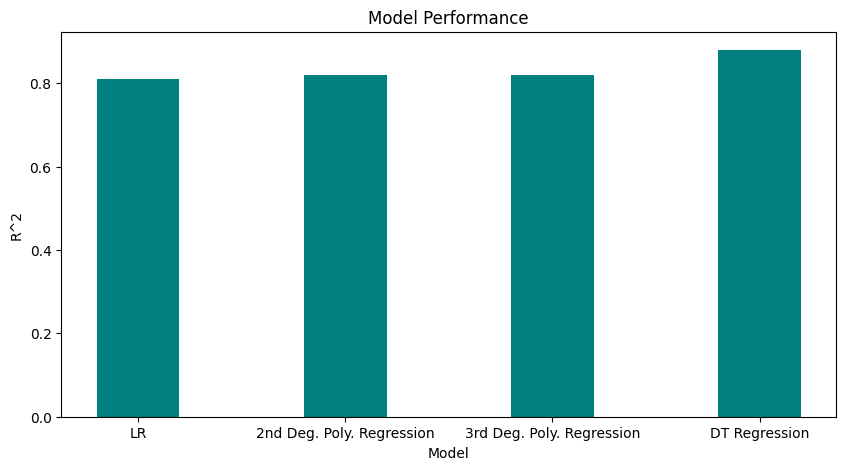

In [ ]:
data = [['LR', 0.81], ['2nd Deg. Poly. Regression', 0.82], ['3rd Deg. Poly. Regression', 0.82], ['DT Regression', 0.88]]
dfm = pd.DataFrame(data = data, columns=['Algorithm', 'R^2'])

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(dfm['Algorithm'], dfm['R^2'], color ='teal',
        width = 0.4)

plt.xlabel("Model")
plt.ylabel("R^2")
plt.title("Model Performance")
plt.show()

### Modeling using More Features

Splitting data into training, validation and testing sets


In [ ]:
X, y = df_bike_model.drop('Profit',axis=1), df_bike_model['Profit']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.2, random_state=300)
X_test, y_test = df_bike_test.drop('Profit',axis=1), df_bike_test['Profit']

#### Data Scaling

In [ ]:
scaler = StandardScaler()

X_train_scaled =scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

#### Linear Regression

In [ ]:
lm = LinearRegression().fit(X_train_scaled,y_train)
print("Linear Regression Training Score: ", round(lm.score(X_train_scaled,y_train),2))

Linear Regression Training Score:  0.83


#### Second Degree Polynomial Regression

In [ ]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train.values)
lm_poly = LinearRegression().fit(X_train_poly,y_train)
print("Second Degree Polynomial Regression Training Score: ", round(lm_poly.score (X_train_poly,y_train),2))

Second Degree Polynomial Regression Training Score:  0.89


#### Third Degree Polynomial Regression

In [ ]:
poly3 = PolynomialFeatures(degree=3)
X_train_poly3 = poly3.fit_transform(X_train.values)
lm_poly3 = LinearRegression().fit(X_train_poly3,y_train)
print("Third Degree Polynomial Regression Training Score: ", round(lm_poly3.score (X_train_poly3,y_train),2))

Third Degree Polynomial Regression Training Score:  0.89


#### Decision Tree Regression

In [ ]:
td = DecisionTreeRegressor(random_state=300,max_depth=8)
td.fit(X_train,y_train)
print("Decision Tree Regression Training Score: ", round(td.score(X_train,y_train),2))

Decision Tree Regression Training Score:  0.92


In [ ]:
print("Decision Tree Regression Validation Score: ",round(td.score(X_val,y_val),2))

Decision Tree Regression Validation Score:  0.92


In [ ]:
print("Decision Tree Regression Testing Score: ",round(td.score(X_test,y_test),2))

Decision Tree Regression Testing Score:  0.92


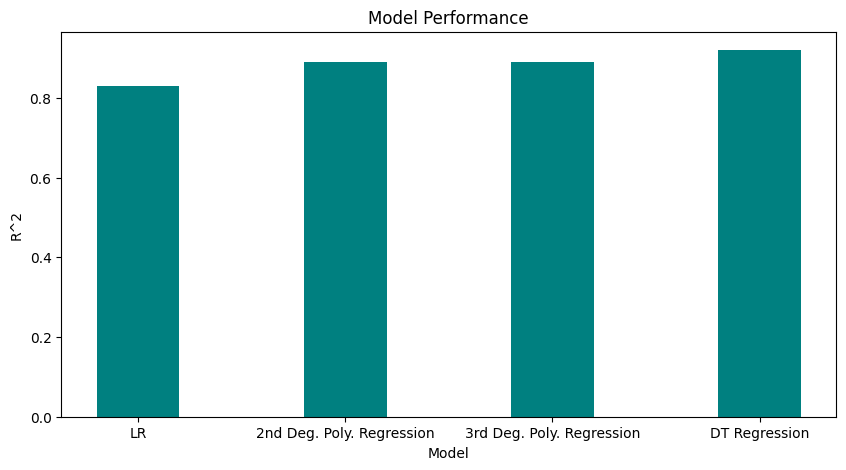

In [ ]:
data = [['LR', 0.83], ['2nd Deg. Poly. Regression', 0.89], ['3rd Deg. Poly. Regression', 0.89], ['DT Regression', 0.92]]
dfm = pd.DataFrame(data = data, columns=['Algorithm', 'R^2'])

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(dfm['Algorithm'], dfm['R^2'], color ='teal',
        width = 0.4)

plt.xlabel("Model")
plt.ylabel("R^2")
plt.title("Model Performance")
plt.show()

# **Result Evaluation and Interpretation**

## Evaluate the Result

### Predicted Profit for Year 2016

In [ ]:
pred = round(td.predict(X_test).sum())
print("Predicted profit for year 2016: ", pred)

Predicted profit for year 2016:  7029602


### Actual Profit for Year 2016

In [ ]:
actual = y_test.sum()
print("Actual profit for year 2016: ", actual)

Actual profit for year 2016:  7002220


### Interpretation

In [ ]:
diff = round(((pred-actual)/actual)*100,2)
print("Difference between actual and predicted profit for year 2016 is", diff, "%")

Difference between actual and predicted profit for year 2016 is 0.39 %


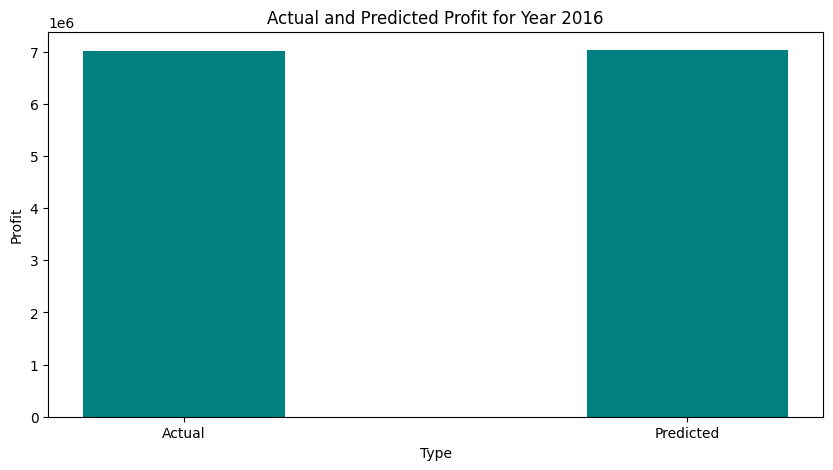

In [ ]:
data = [['Actual', actual], ['Predicted', pred]]
dfp = pd.DataFrame(data = data, columns=['Type', 'Profit'])

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(dfp['Type'], dfp['Profit'], color ='teal',
        width = 0.4)

plt.xlabel("Type")
plt.ylabel("Profit")
plt.title("Actual and Predicted Profit for Year 2016")
plt.show()

In [ ]:
df_pred = pd.DataFrame(columns=['Year', 'Profit'])
year = [2011,2012,2013,2014,2015]
for i in year:
    df_pred.loc[len(df_pred.index)] = [i, df_bike_model[df_bike_model['Year']==i]['Profit'].sum()]

df_pred.loc[len(df_pred.index)] = [2016, pred]
df_pred

,Year,Profit
0,2011,2877185
1,2012,2938519
2,2013,5912432
3,2014,5818522
4,2015,7497361
5,2016,7029602


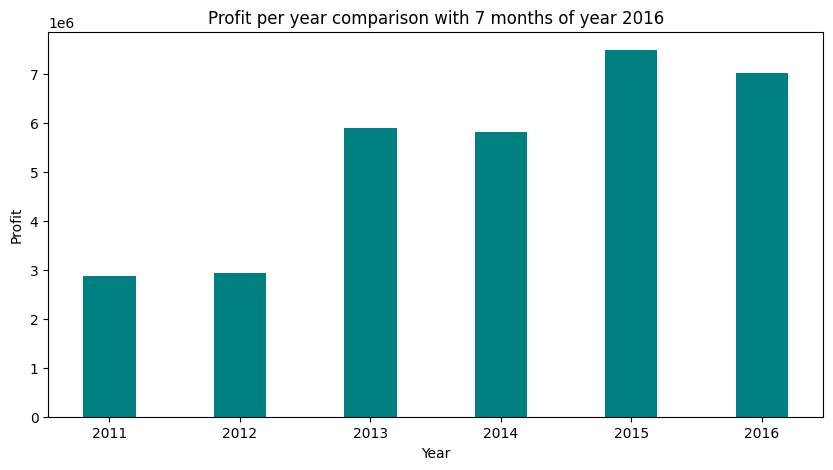

In [ ]:
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(df_pred['Year'], df_pred['Profit'], color ='teal',
        width = 0.4)

plt.xlabel("Year")
plt.ylabel("Profit")
plt.title("Profit per year comparison with 7 months of year 2016")
plt.show()

The profir for year 2016 is lower than year 2015 because the dataset contains data only for first 7 months of year 2016.

The graphs show per year profit for whole years of 2011 to 2015 compared to only first 7 months of year 2016.

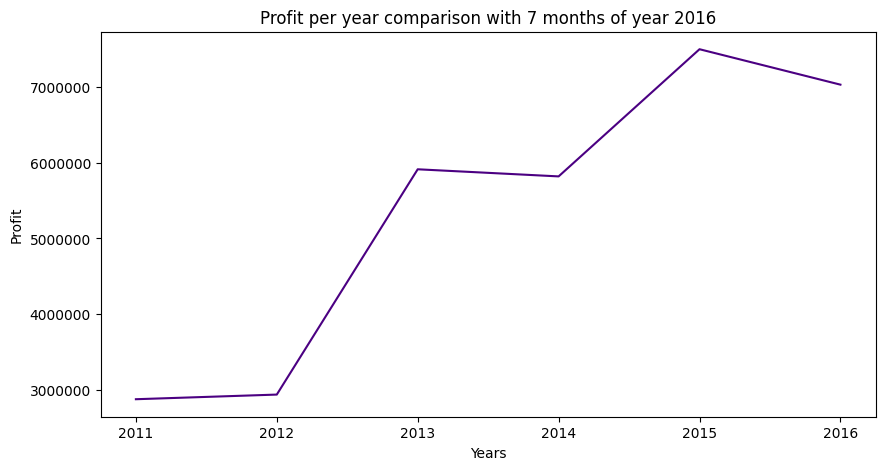

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(df_pred['Year'],df_pred['Profit'],  color = 'indigo')
plt.title('Profit per year comparison with 7 months of year 2016')
plt.ylabel('Profit')
plt.xlabel('Years')
plt.ticklabel_format(style = 'plain');

Now, profit comparison for first 7 months of each year.

In [ ]:
df_bike_model_ac = df_bike_model[df_bike_model['Month']<=7]
df_pred = pd.DataFrame(columns=['Year', 'Profit'])
year = [2011,2012,2013,2014,2015]
for i in year:
    df_pred.loc[len(df_pred.index)] = [i, df_bike_model_ac[df_bike_model_ac['Year']==i]['Profit'].sum()]

df_pred.loc[len(df_pred.index)] = [2016, pred]
df_pred

,Year,Profit
0,2011,1604515
1,2012,1633128
2,2013,1415351
3,2014,5818522
4,2015,2070934
5,2016,7029602


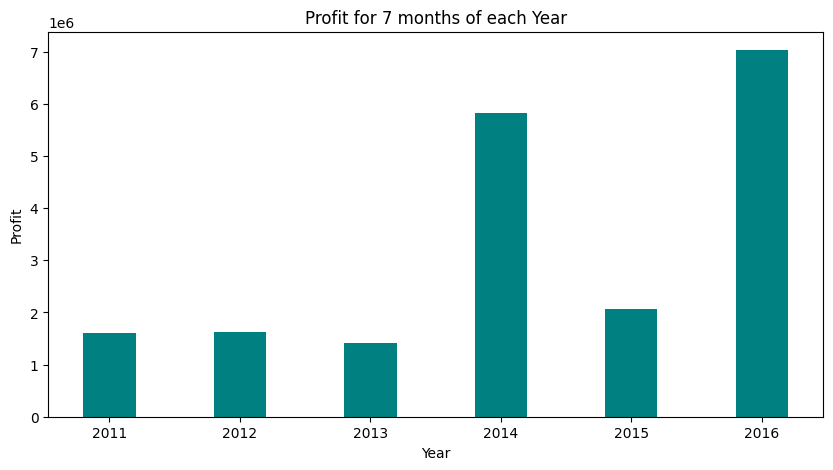

In [ ]:
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(df_pred['Year'], df_pred['Profit'], color ='teal',
        width = 0.4)

plt.xlabel("Year")
plt.ylabel("Profit")
plt.title("Profit for 7 months of each Year")
plt.show()

The graphs show per year profit only for first 7 months of year 2011 to yaer 2016.

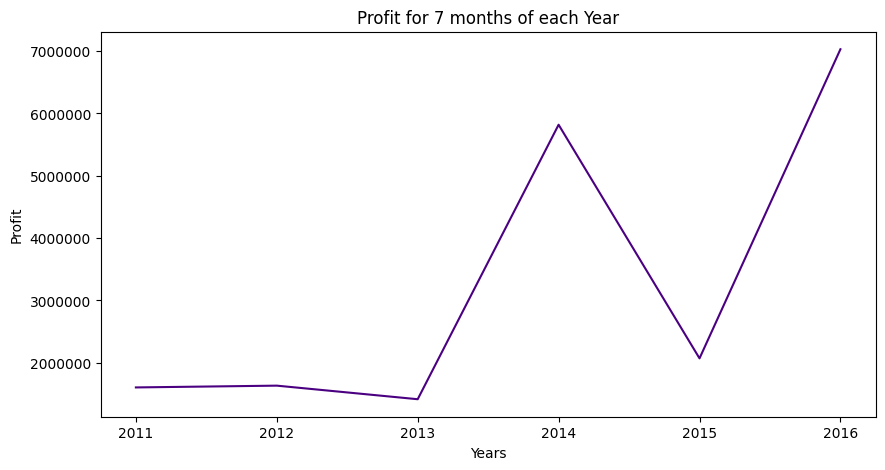

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(df_pred['Year'],df_pred['Profit'],  color = 'indigo')
plt.title('Profit for 7 months of each Year')
plt.ylabel('Profit')
plt.xlabel('Years')
plt.ticklabel_format(style = 'plain');

### Trend Analysis

1. Profit for first 7 months of year 2013 and year 2015 is low but for next 5 months it goes straight up so these months had been more profitable.
2. For year 2014, major profit share had been earned in first 7 months of the year.
3. Year 2011 and 2012 showed similar profit trend in both first 7 months of the year and whole year.
4. For year 2016, the predicted profit shows increase and it will be higher compared to earlier years and the actual profit value supports the prediction as well.

### Conclusion

All data mining goals are achieved:

1. Extracted meaningful insights according to location, time period and customer demographics i.e., sales on weekend is higher than weekday sales, sales from male is slightly higher than female, adults age group is profitable, senior age group is least profitable and Short-Sleeve Classic Jersey has negative profit.
2. Determined the highest profit earning country is USA and lowest profitable country is France, highest profitable months are June and December, lowest profitable months are January and November, highest profitable product category is Bikes and lowest profitable product category Clothing.
3. Forecasted profit for year 2016, which is close to the actual profit value with difference of only 0.39%.


Now, bikes sales analysis has provided meaningful insights to formulate marketing strategy to enhance profit and achieve business objective. The developed model meets the business objectives.


## Review Process

The process has been reviewed and all steps of CRISP-DM methodology have been taken into account to execute the project. The developed model is accurate and has been built correctly.

## Determine Next Steps

The developed model is ready for the deployment phase.

# **Deployment**

Google Colab Notebook has been presented as the deployment phase.

# **Members' Contribution**

In [ ]:
ct = pd.read_csv("https://raw.githubusercontent.com/usman2155904/wqd7003/main/Contribution.csv")
ct.head(4)

,Name,Student ID,Task,DM Goal
0,Tarsvini a/p Ravinther,17193844,Exploratory Data Analysis,First
1,Vijaykumar Kartha Ramachandran,S2033073,Exploratory Data Analysis,Second
2,Usman Ali,S2155904,"Data Preparation, Modeling, Evaluation and Int...",Third
3,Rongxuan Lei,22071941,"Data Preprocessing, Verify Data Quality",Trend Analysis
